Temperature Forecast Project using ML

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv 



In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Retrieving the dataset
url="https://raw.githubusercontent.com/dsrscientist/Dataset2/refs/heads/main/temperature.csv"
df=pd.read_csv(url)
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
#Exploratory Data Analysis
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
#Checking the dimension of the dataset
df.shape

(7752, 25)

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

This dataset contains 7752 rows and 25 columns. Out of which the variables "Next_Tmax" and "Next_Tmin" are considered as targets for different approaches, the remaining 23 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "Next_Tmax"(Regression problem) and the "Next_Tmin" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are two types of datatypes float and object. There are null values also present which has to be taken care of. 

In [8]:
#Missing Values
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

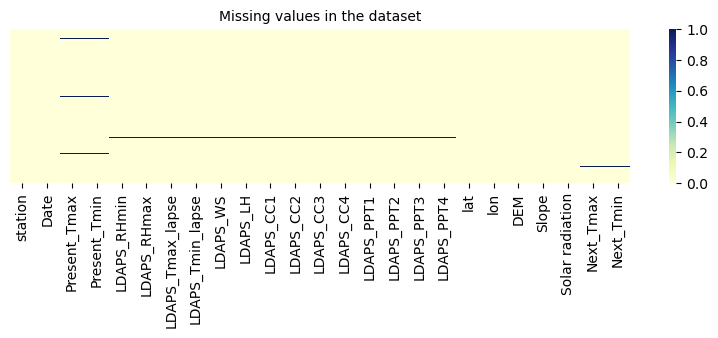

In [15]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False,cmap='YlGnBu')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present very minimal null values.

In [16]:
#Feature Analysis
#Unique Values
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
station                             25  float64
Date                               310   object
Present_Tmax                       167  float64
Present_Tmin                       155  float64
LDAPS_RHmin                       7672  float64
LDAPS_RHmax                       7664  float64
LDAPS_Tmax_lapse                  7675  float64
LDAPS_Tmin_lapse                  7675  float64
LDAPS_WS                          7675  float64
LDAPS_LH                          7675  float64
LDAPS_CC1                         7569  float64
LDAPS_CC2                         7582  float64
LDAPS_CC3                         7599  float64
LDAPS_CC4                         7524  float64
LDAPS_PPT1                        2812  float64
LDAPS_PPT2                        2510  float64
LDAPS_PPT3                        2356  float64
LDAPS_PPT4                        1918  float64
lat                                 12  float64
lon                                 25  float64
DEM                                 25  float64
Slope                               27  float64
Solar radiation                   1575  float64
Next_Tmax                          183  float64
Next_Tmin                          157  float64

About the number of unique values:

Next_Tmax and Next_Tmin are the target variables with 183 and 157 unique values respectively of 7752 total in the dataset. We are facing two regression problems since both target variables are continuous and numerical.

Only the Date datatype is Object, this feature will be converted in datetime later, and the rest of the features are numerical.

However, the station(25), lat(12), lon(25), DEM(25), and Slope(27) columns, despite being numerical, seem to be categorical and should be analyzed as categorical as well during EDA.

In [19]:
# Inspect the unique values of the target variable
column = 'Next_Tmax'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique {column}:\n{df[column].unique()}")

Feature Next_Tmax:
Next_Tmax
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: count, Length: 183, dtype: int64
Unique Next_Tmax:
[29.1 30.5 31.1 31.7 31.2 31.5 30.9 31.3 32.6 31.4 30.8 33.1 31.8 30.6
 32.  24.8 27.3 28.1 27.9 28.2 28.9 27.6 27.1 27.5 26.8 28.7 27.8 29.2
 28.8 30.  30.1 29.4 31.6 30.2 30.4 32.5 31.  25.2 28.4 28.3 27.4 26.2
 28.  26.7 28.6 27.7 28.5 30.7 29.6 29.9 29.3 32.2 33.6 30.3 32.3 29.8
 29.7 29.5 29.  23.4 26.4 26.6 26.1 25.4 27.2 27.  26.3 25.5 25.6 25.9
 23.  26.5 26.  25.7 22.4 25.8 25.1 24.9 24.3 24.5 25.3 21.8 24.7 25.
 24.6 23.6 24.1 23.2 23.7 24.2 23.8 23.9 31.9 23.1 33.  32.7 26.9 32.1
 33.3 32.4 33.4 33.5 34.8 34.  34.3 34.5  nan 32.8 33.7 33.2 32.9 34.1
 34.9 35.3 34.6 35.  33.9 34.7 36.6 34.4 35.8 35.2 33.8 35.6 35.1 34.2
 36.  35.5 35.4 21.6 23.5 24.4 24.  35.9 36.1 22.5 22.8 36.2 21.1 23.3
 22.  22.7 20.9 22.2 22.1 37.  36.9 22.9 35.7 37.1 22.3 22.6 37.8 20.7
 2

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we need to build a regression model.

In [20]:
# Inspect the unique values of the target variable
column = 'Next_Tmin'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Next_Tmin:
Next_Tmin
23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: count, Length: 157, dtype: int64
Unique values: [17.8, 18.7, 18.9, 19.1, 19.3, 19.4, 19.5, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.8, 26.9, nan, 11.3, 12.9, 13.3, 13.4, 13.6, 13.8, 13.9, 14.1, 14.3, 14.4, 14.6, 14.7, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.8, 19.0,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we will build a regression model since the variable is numerical and continuous.

In [21]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
Date
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: count, Length: 310, dtype: int64


In [22]:
#Imputing Missing Values
missing_val


Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

If the number of missing observations is less than 5% we can drop those data. We can go ahead and delete the missing data except the target variables as it would be better to keep it for prediction.


In [23]:
cols_with_missing = missing_val[missing_val['Null values'] > 0].index.to_list()
cols_with_missing

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin']

In [24]:
# Dropping the missing values less than 5%(missing values)
df_new = df.dropna(subset=cols_with_missing)


In [25]:
df=df_new.copy()
df.shape

(7588, 25)

In [26]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Missing values not found

In [27]:
#Statistical presentation
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

The summary of the statistics looks good since there are no negative or null values and we have same count.

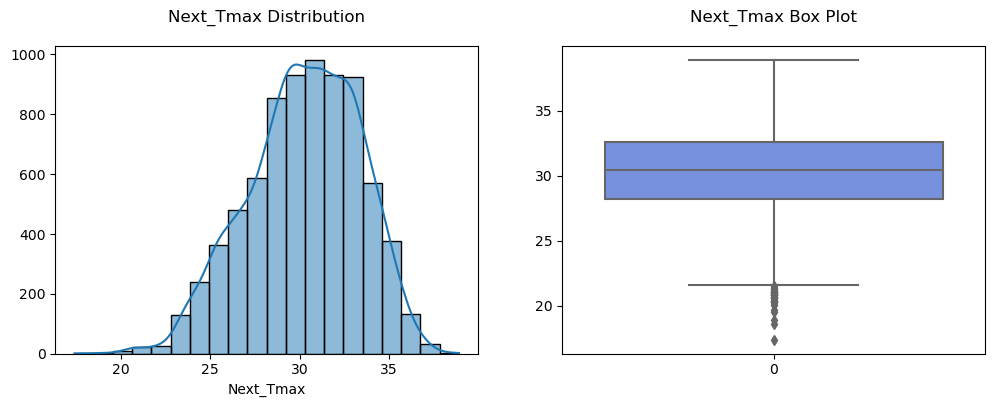

Skewness of Next_Tmax : -0.3348416351390219


In [28]:
#Univariate Analysis
#Visualize target distribution
col = 'Next_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution is skewed to the left and we can observe outliers present.

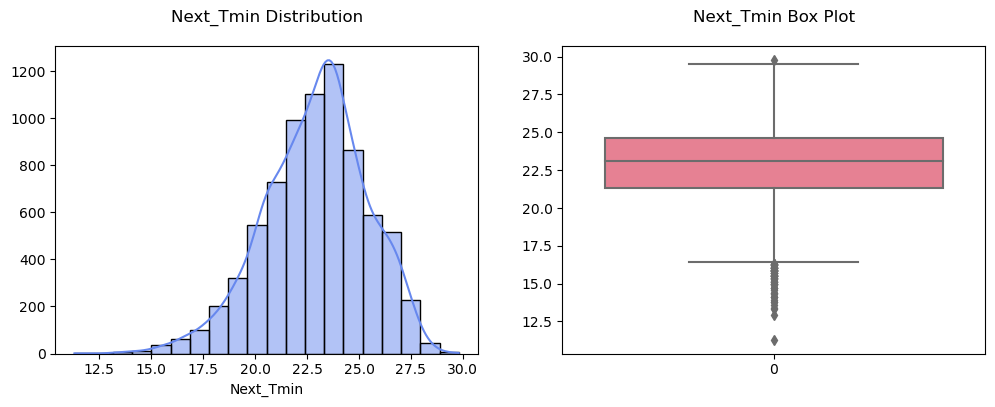

Skewness of Next_Tmin : -0.3936624459457225


In [29]:
col = 'Next_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('husl')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Next_Tmin has skewness towards left and has outliers too.

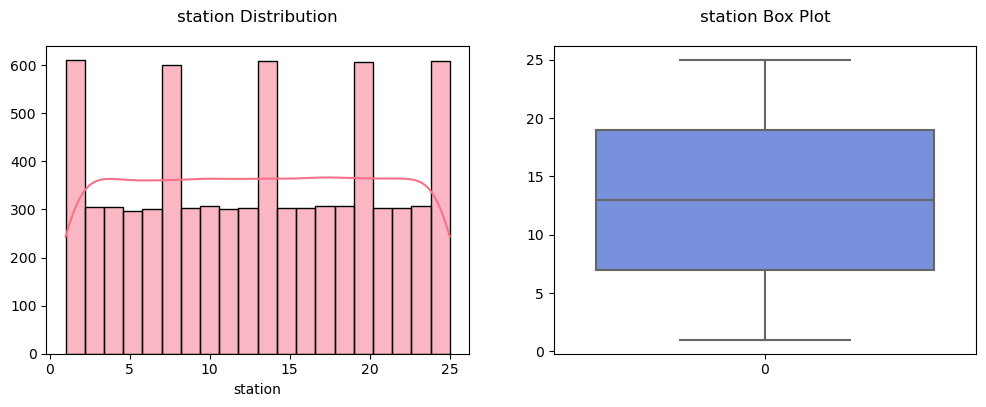

Skewness of station : -0.004177859024526559


In [30]:
#Visualise the independant variables.
col = 'station'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution seems to be normal and there are no outliers present.

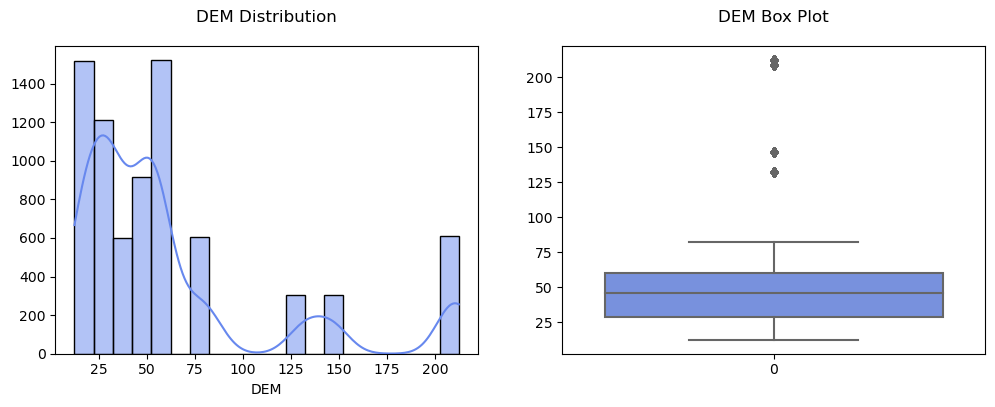

Skewness of DEM : 1.7216166816077285


In [31]:
col = 'DEM'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution seems to slightly skewed to the right, but it is discrete. There are few outliers present.

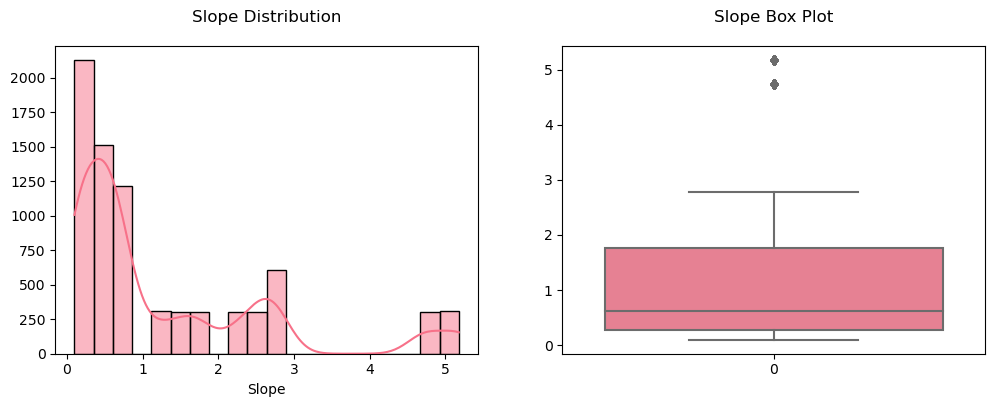

Skewness of Slope : 1.5590502641157087


In [33]:
col = 'Slope'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('husl')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distrubution seems to be skewed discretely towards right, there are few outliers present.

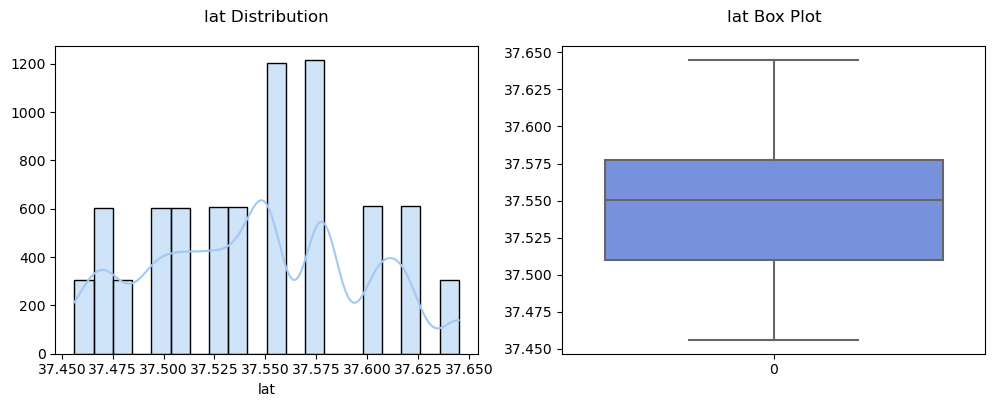

Skewness of lat : 0.08537672617082039


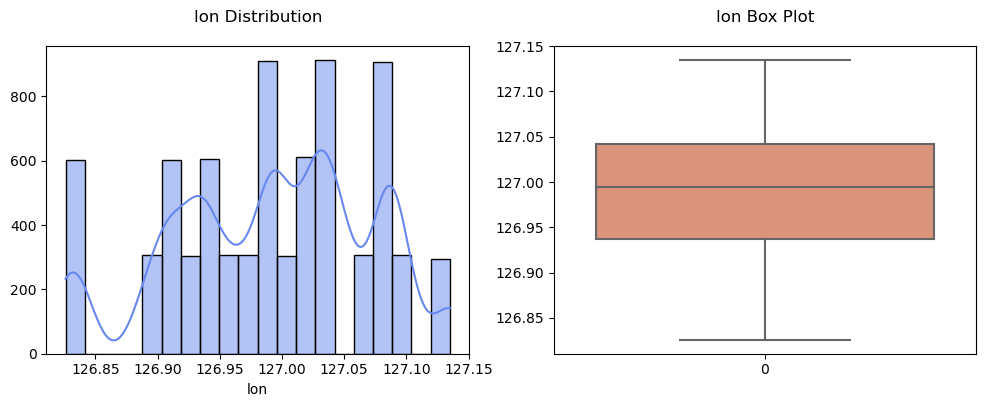

Skewness of lon : -0.28904839237055413


In [39]:
col = 'lat'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

col = 'lon'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('flare')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution is near to normal and no outliers present.

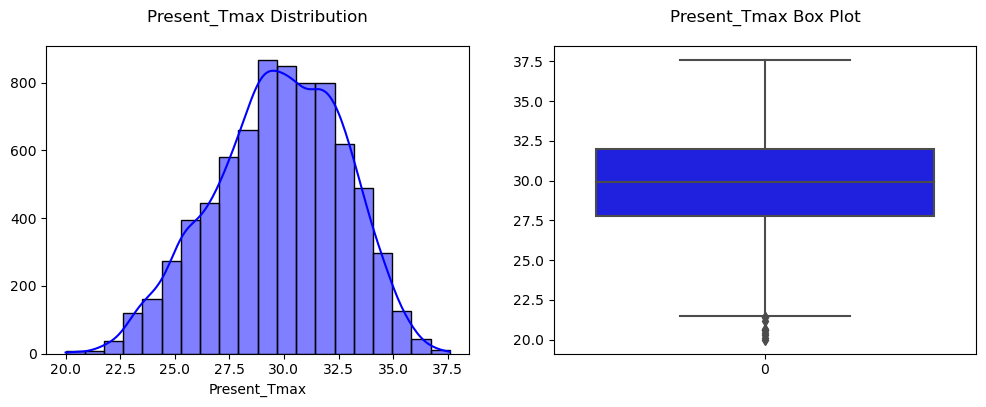

Skewness of Present_Tmax : -0.25706886624626474


In [41]:
col = 'Present_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Blue')
sns.boxplot(df[col], ax=axes[1],color='Blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is slightly skewed to the left and there are outliers present.

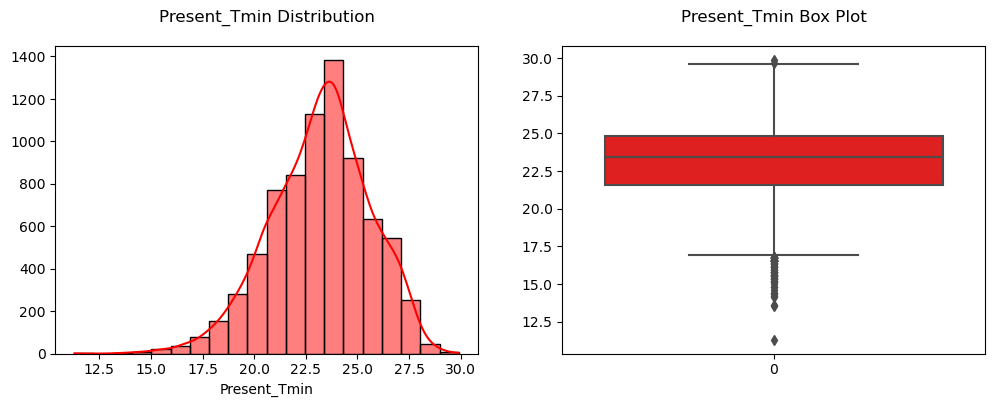

Skewness of Present_Tmin : -0.3538218967241725


In [43]:
col = 'Present_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Red')
sns.boxplot(df[col], ax=axes[1],color='Red')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the left and there are outliers present in the box plot.

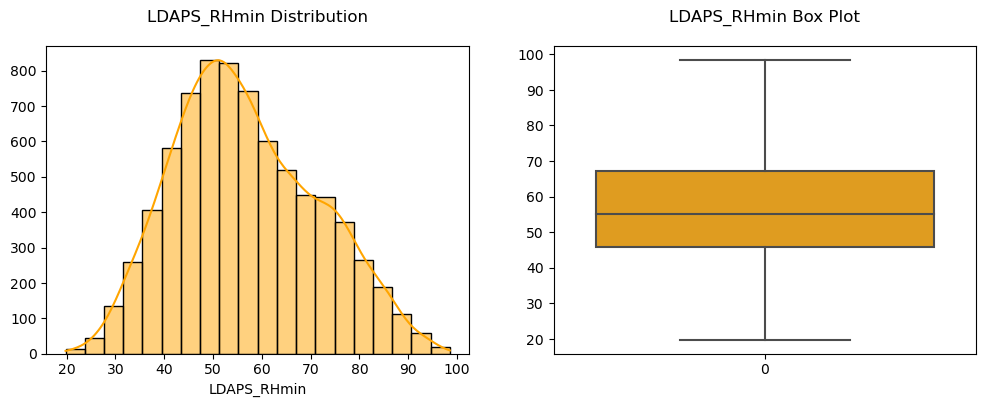

Skewness of LDAPS_RHmin : 0.30139555867014534


In [44]:
col = 'LDAPS_RHmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Orange')
sns.boxplot(df[col], ax=axes[1],color='Orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribtuion is skewed to the right, and no outliers present.

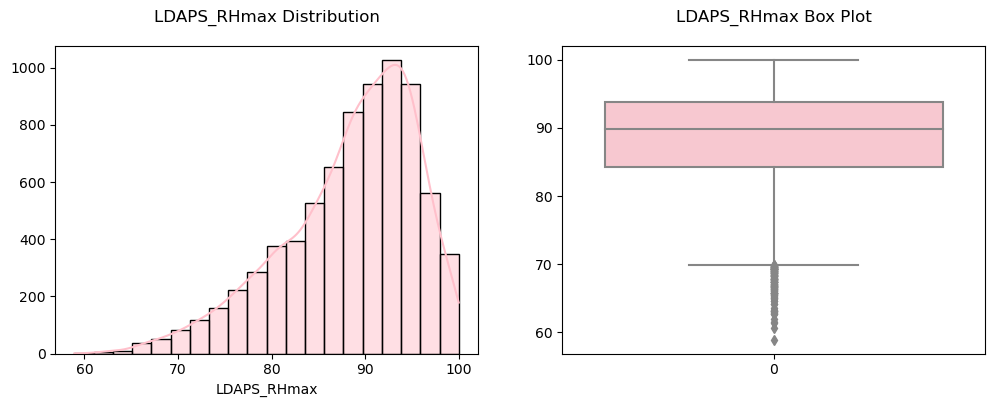

Skewness of LDAPS_RHmax : -0.8452636249574039


In [45]:
col = 'LDAPS_RHmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Pink')
sns.boxplot(df[col], ax=axes[1],color='Pink')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the left and there are outliers present. 

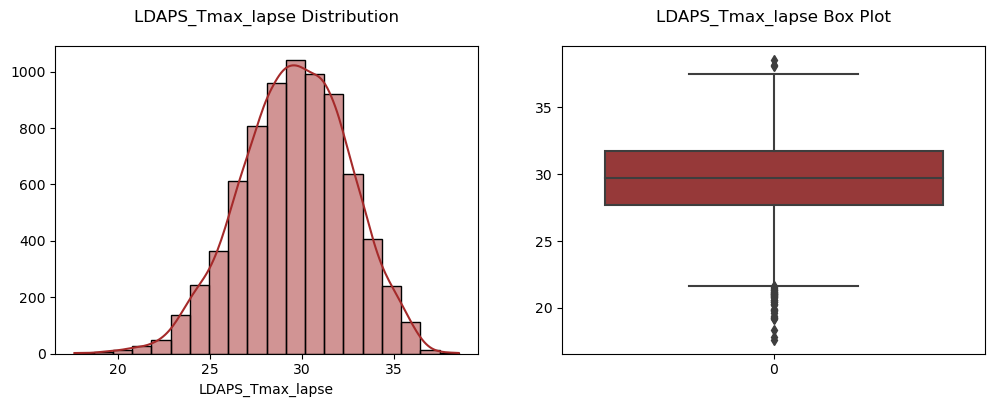

Skewness of LDAPS_Tmax_lapse : -0.22234900075307953


In [46]:
col = 'LDAPS_Tmax_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Brown')
sns.boxplot(df[col], ax=axes[1],color='Brown')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the left and there are outliers present.

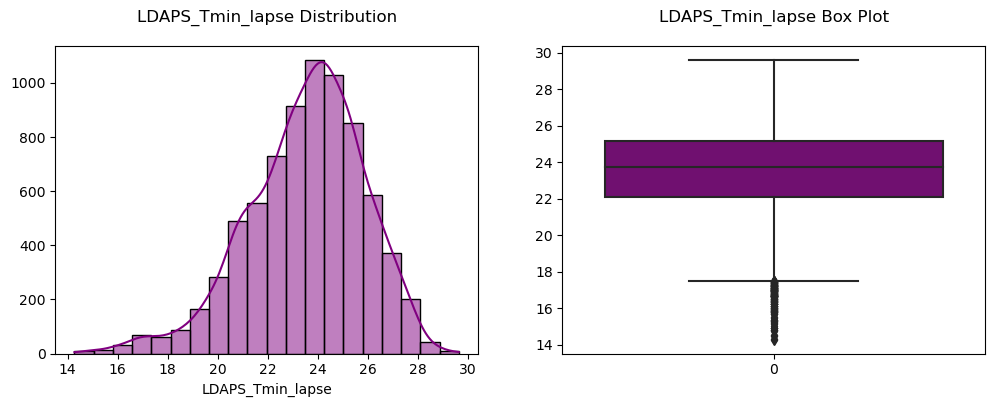

Skewness of LDAPS_Tmin_lapse : -0.5740346797849039


In [47]:
col = 'LDAPS_Tmin_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Purple')
sns.boxplot(df[col], ax=axes[1],color='Purple')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the left and it has outliers present. 

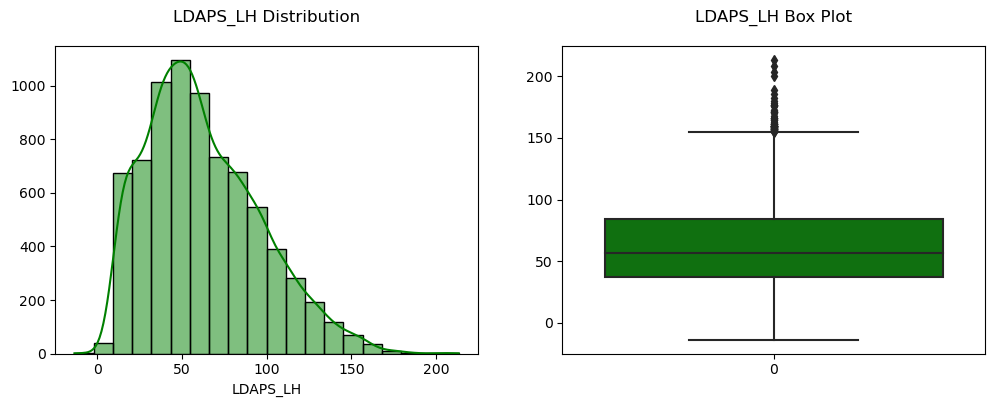

Skewness of LDAPS_LH : 0.6629705787700664


In [48]:
col = 'LDAPS_LH'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Green')
sns.boxplot(df[col], ax=axes[1],color='Green')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and there outliers present.

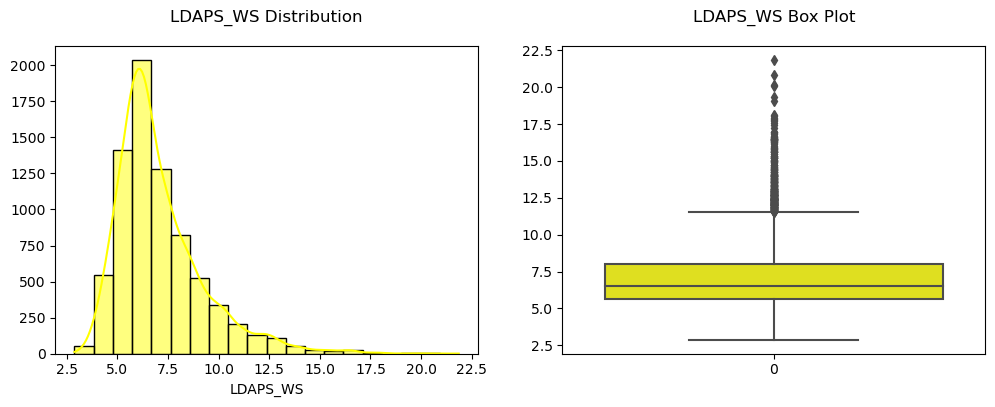

Skewness of LDAPS_WS : 1.5539261125674748


In [50]:
col = 'LDAPS_WS'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Yellow')
sns.boxplot(df[col], ax=axes[1],color='Yellow')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and outliers are present.

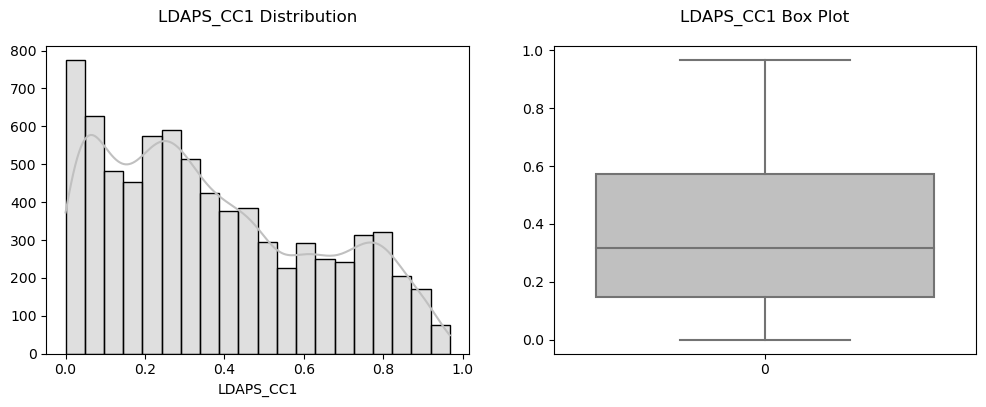

Skewness of LDAPS_CC1 : 0.4567158382781983


In [51]:
col = 'LDAPS_CC1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Silver')
sns.boxplot(df[col], ax=axes[1],color='Silver')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has no outliers present.

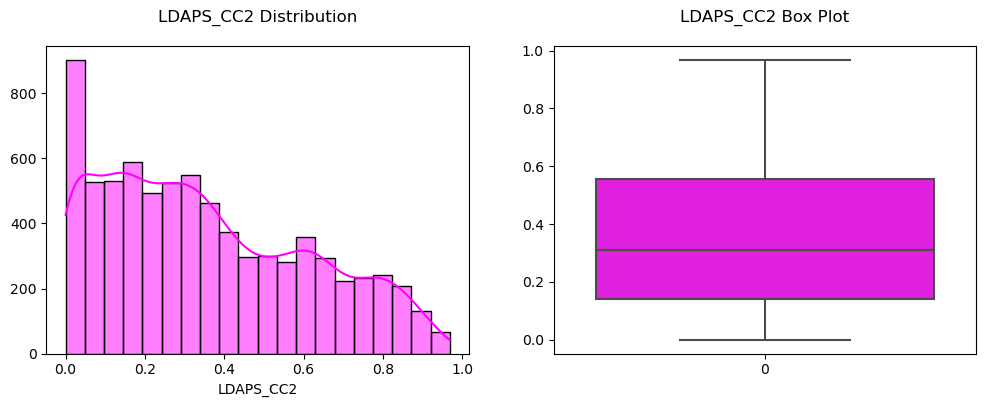

Skewness of LDAPS_CC2 : 0.4739293093576641


In [52]:
col = 'LDAPS_CC2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Magenta')
sns.boxplot(df[col], ax=axes[1],color='Magenta')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has no outliers present.

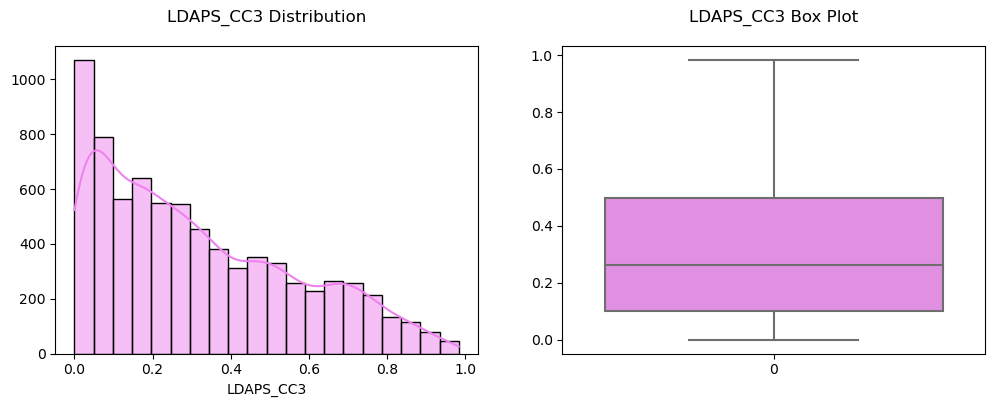

Skewness of LDAPS_CC3 : 0.6396492372098013


In [53]:
col = 'LDAPS_CC3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Violet')
sns.boxplot(df[col], ax=axes[1],color='Violet')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and no outliers present.

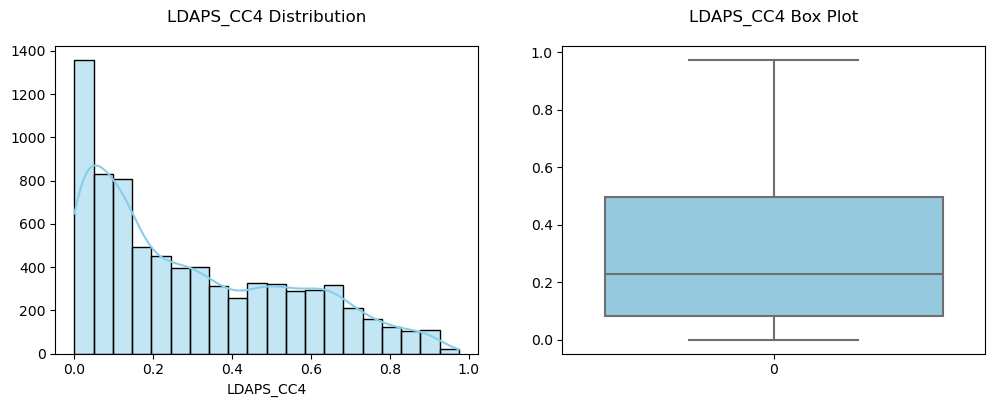

Skewness of LDAPS_CC4 : 0.6638153419746528


In [54]:
col = 'LDAPS_CC4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='SkyBlue')
sns.boxplot(df[col], ax=axes[1],color='SkyBlue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distrubution is skewed to the right and there are no outliers present.

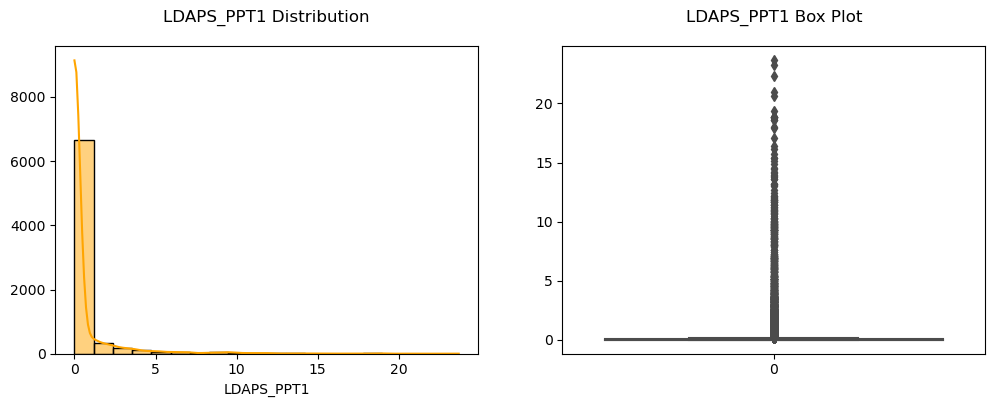

Skewness of LDAPS_PPT1 : 5.3059059957975325


In [55]:
col = 'LDAPS_PPT1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Orange')
sns.boxplot(df[col], ax=axes[1],color='Orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has more outliers present.

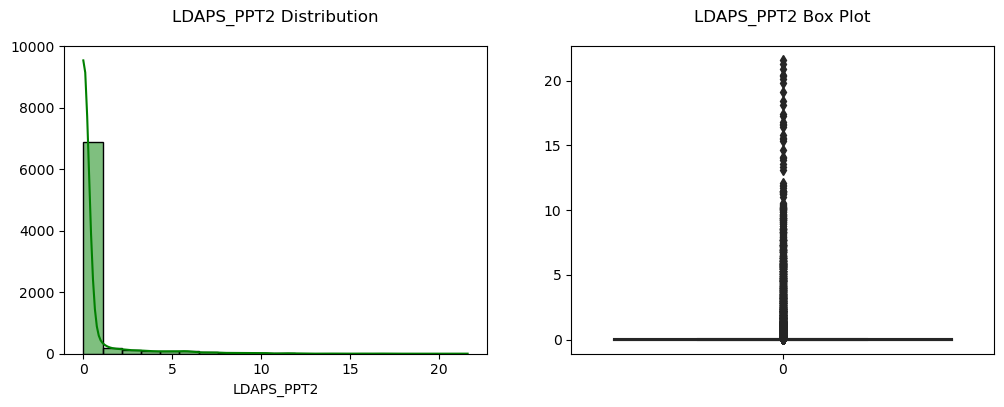

Skewness of LDAPS_PPT2 : 5.710360098053624


In [56]:
col = 'LDAPS_PPT2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Green')
sns.boxplot(df[col], ax=axes[1],color='Green')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has outliers present.

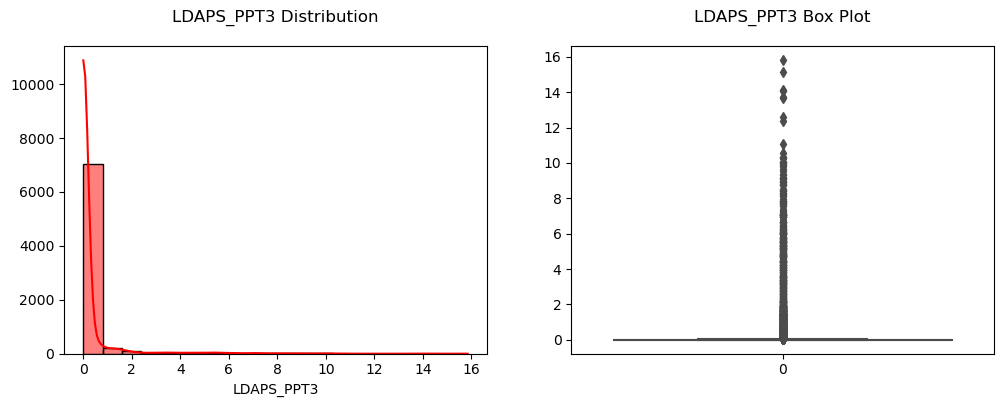

Skewness of LDAPS_PPT3 : 6.356670451431369


In [57]:
col = 'LDAPS_PPT3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='red')
sns.boxplot(df[col], ax=axes[1],color='red')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has outliers.

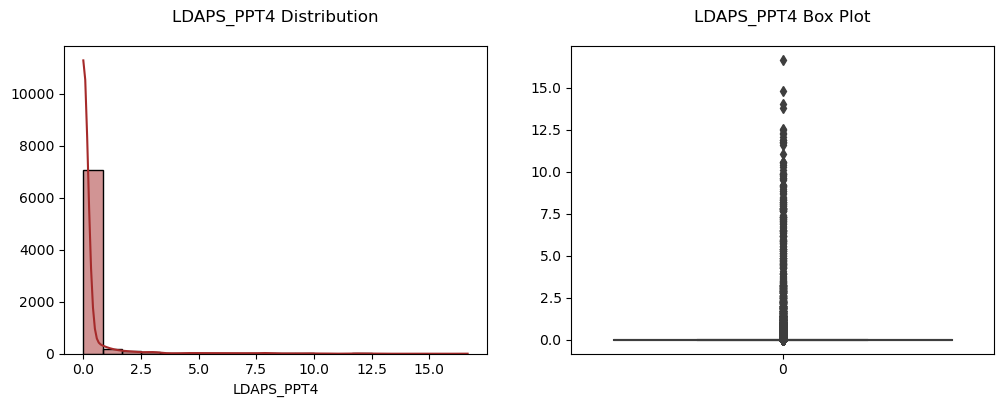

Skewness of LDAPS_PPT4 : 6.6812557353191435


In [58]:
col = 'LDAPS_PPT4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='brown')
sns.boxplot(df[col], ax=axes[1],color='brown')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the right and it has outliers present.

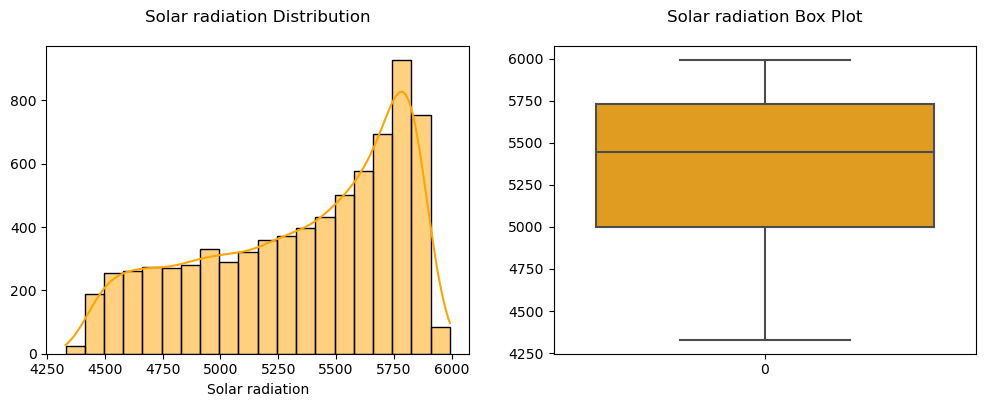

Skewness of Solar radiation : -0.5243245791911233


In [63]:
col = 'Solar radiation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0],color='Orange')
sns.boxplot(df[col], ax=axes[1],color='Orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Distribution is skewed to the left and no outliers present.

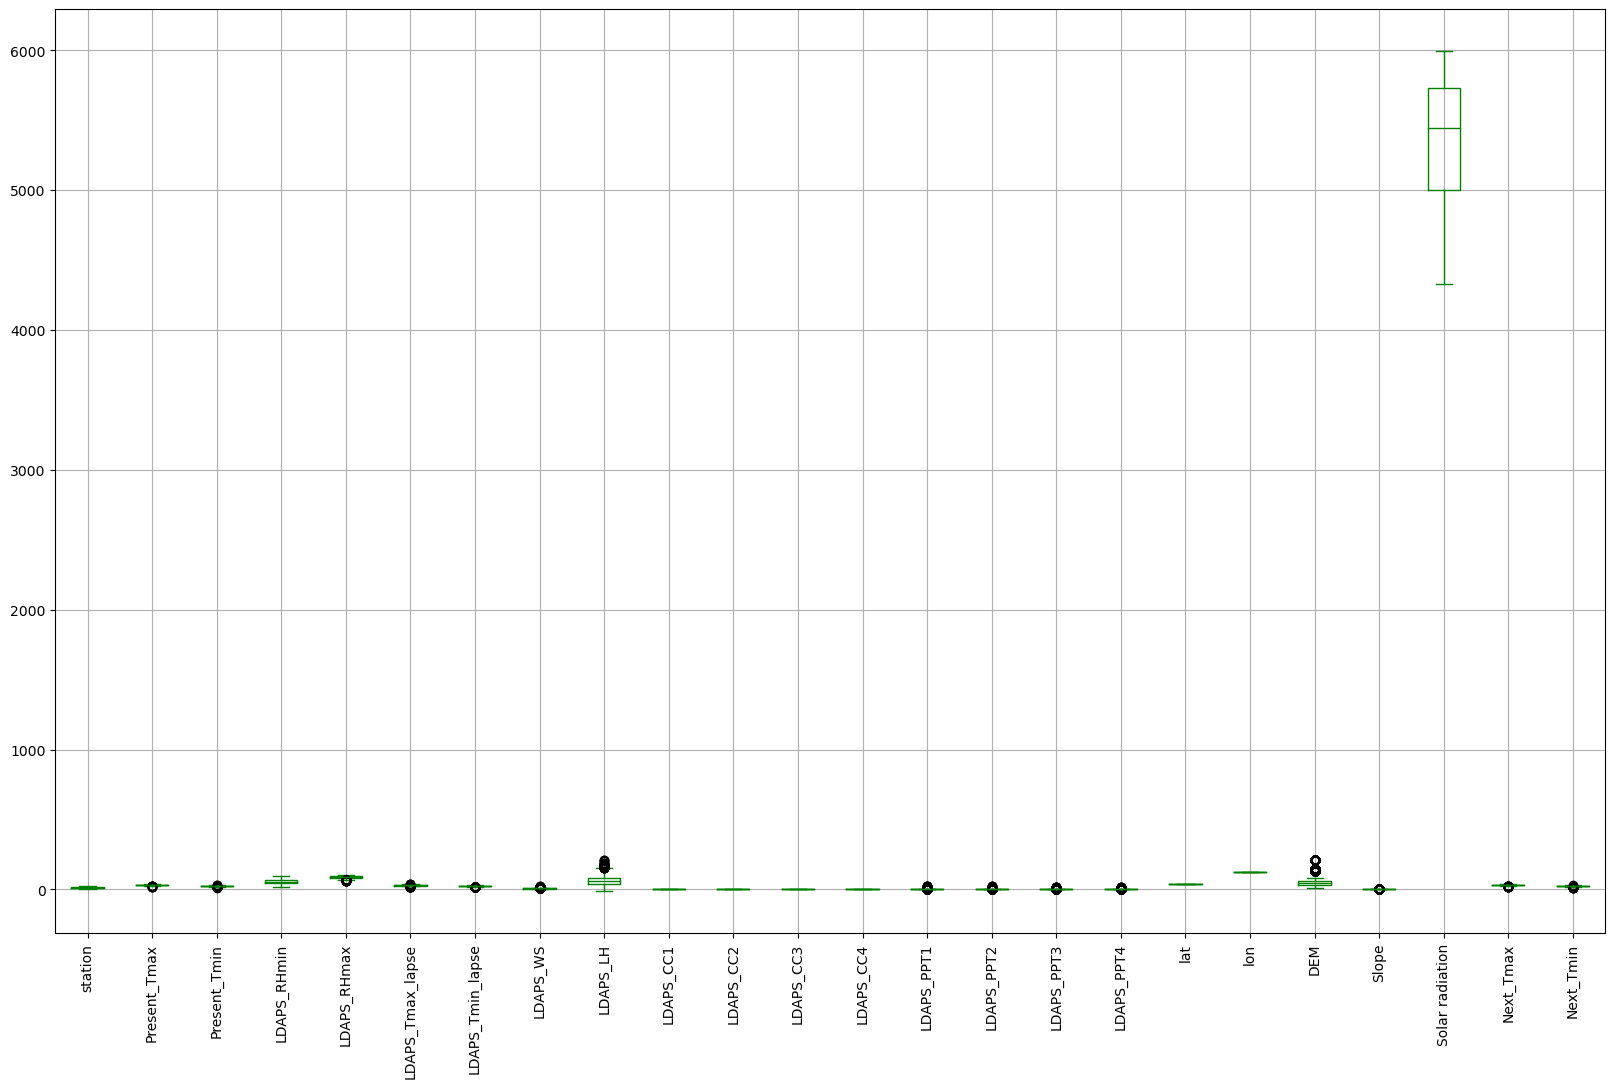

In [64]:
#Univariate box plot
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

In [72]:
#Conversion of date data type
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7745   2017-08-30
7746   2017-08-30
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
Name: Date, Length: 7588, dtype: datetime64[ns]

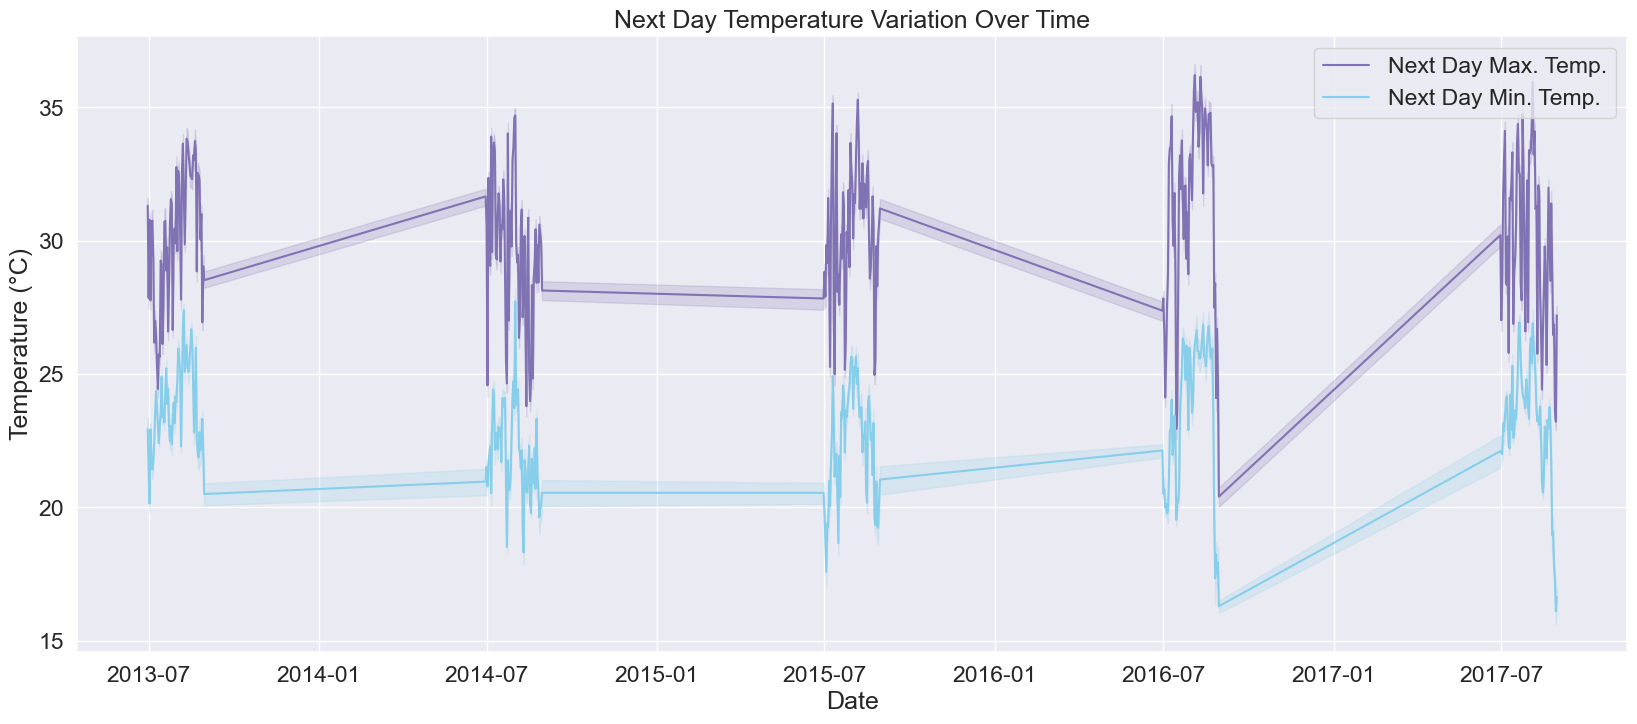

In [74]:
#Bivariate Analysis
# Comparing the Next Day's maximum and minimum temperature over time

sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Next_Tmax', data=df, label='Next Day Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Next_Tmin', data=df, label='Next Day Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.title('Next Day Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

We can observe the max and min temp recording over the period of years, where we can sense it has reached max during 2016 and min during 2018.

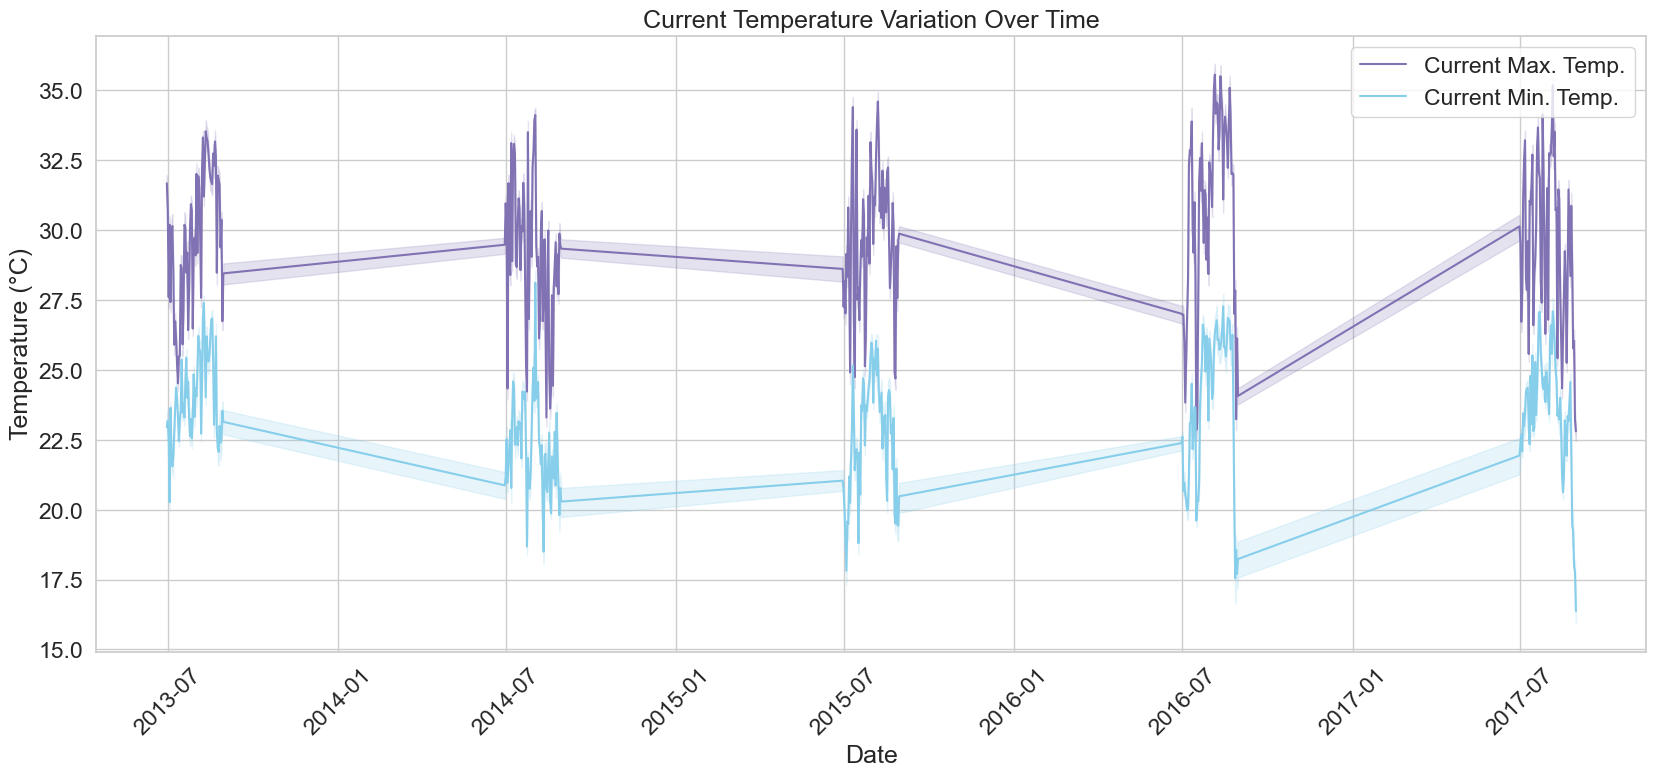

In [75]:
#Comparison of current maximum and minimum temperature over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Current Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Current Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Current Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

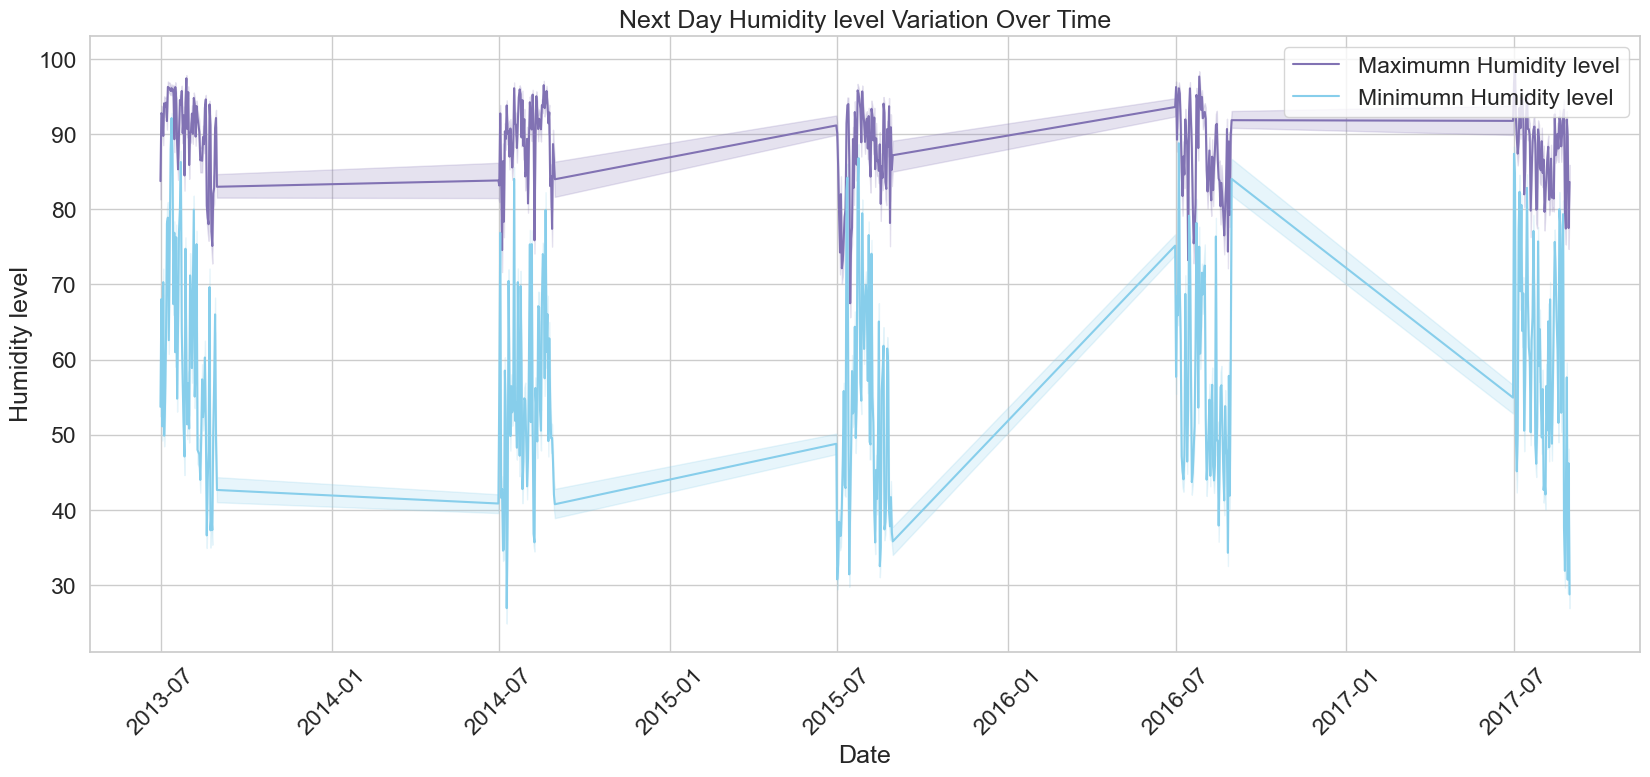

In [76]:
#Comparison of Next Day's humidity level over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='Maximumn Humidity level', color='m')

# line plot for the minimun humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='Minimumn Humidity level', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Humidity level Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity level')

plt.show()


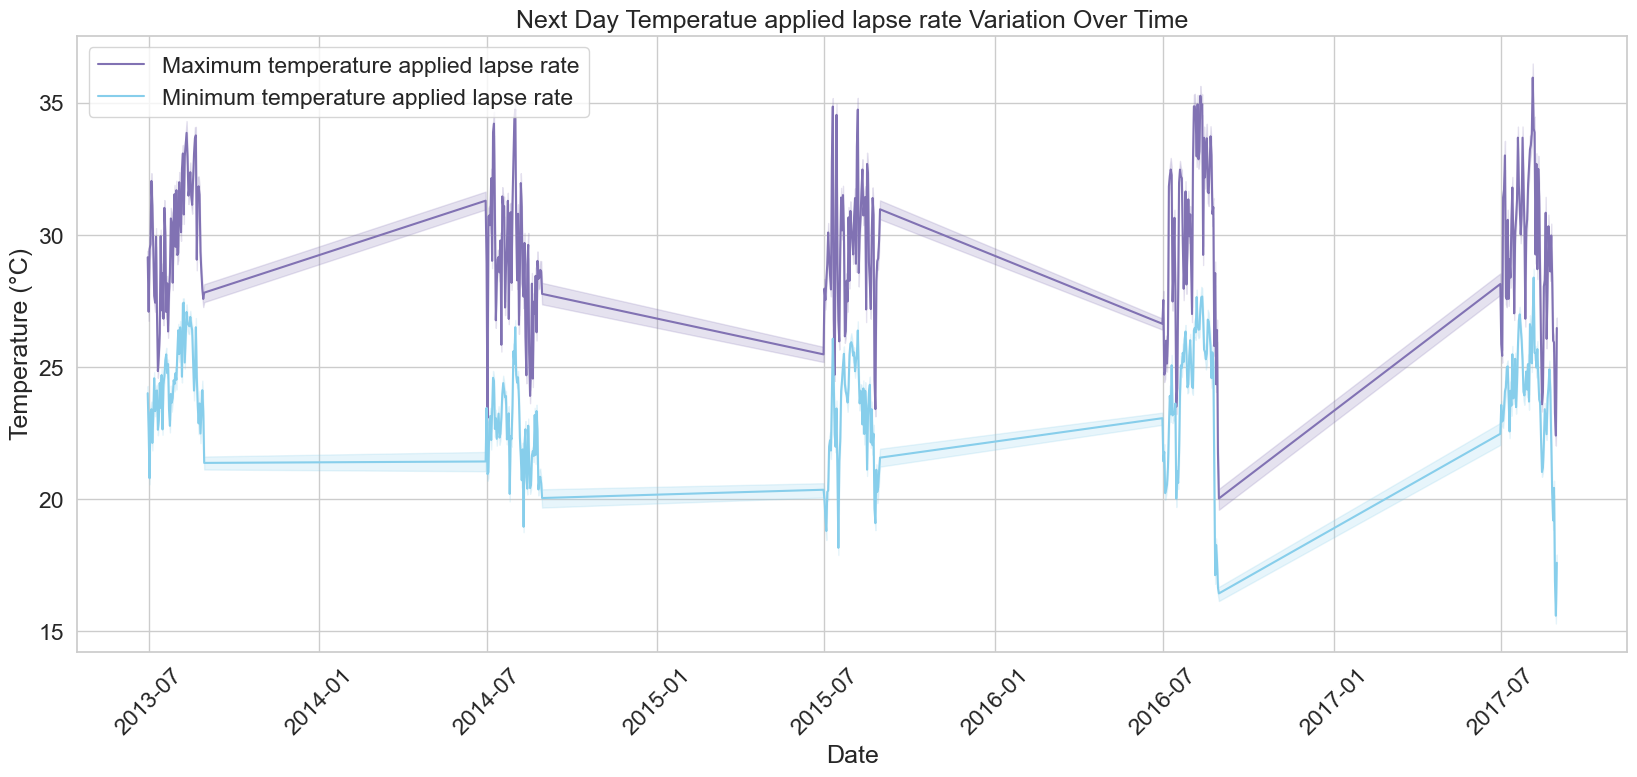

In [77]:
#Comparison of Next Day's Temperatue applied lapse rate over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='LDAPS_Tmax_lapse', data=df, label='Maximum temperature applied lapse rate', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='LDAPS_Tmin_lapse', data=df, label='Minimum temperature applied lapse rate', color='skyblue')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Next Day Temperatue applied lapse rate Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()


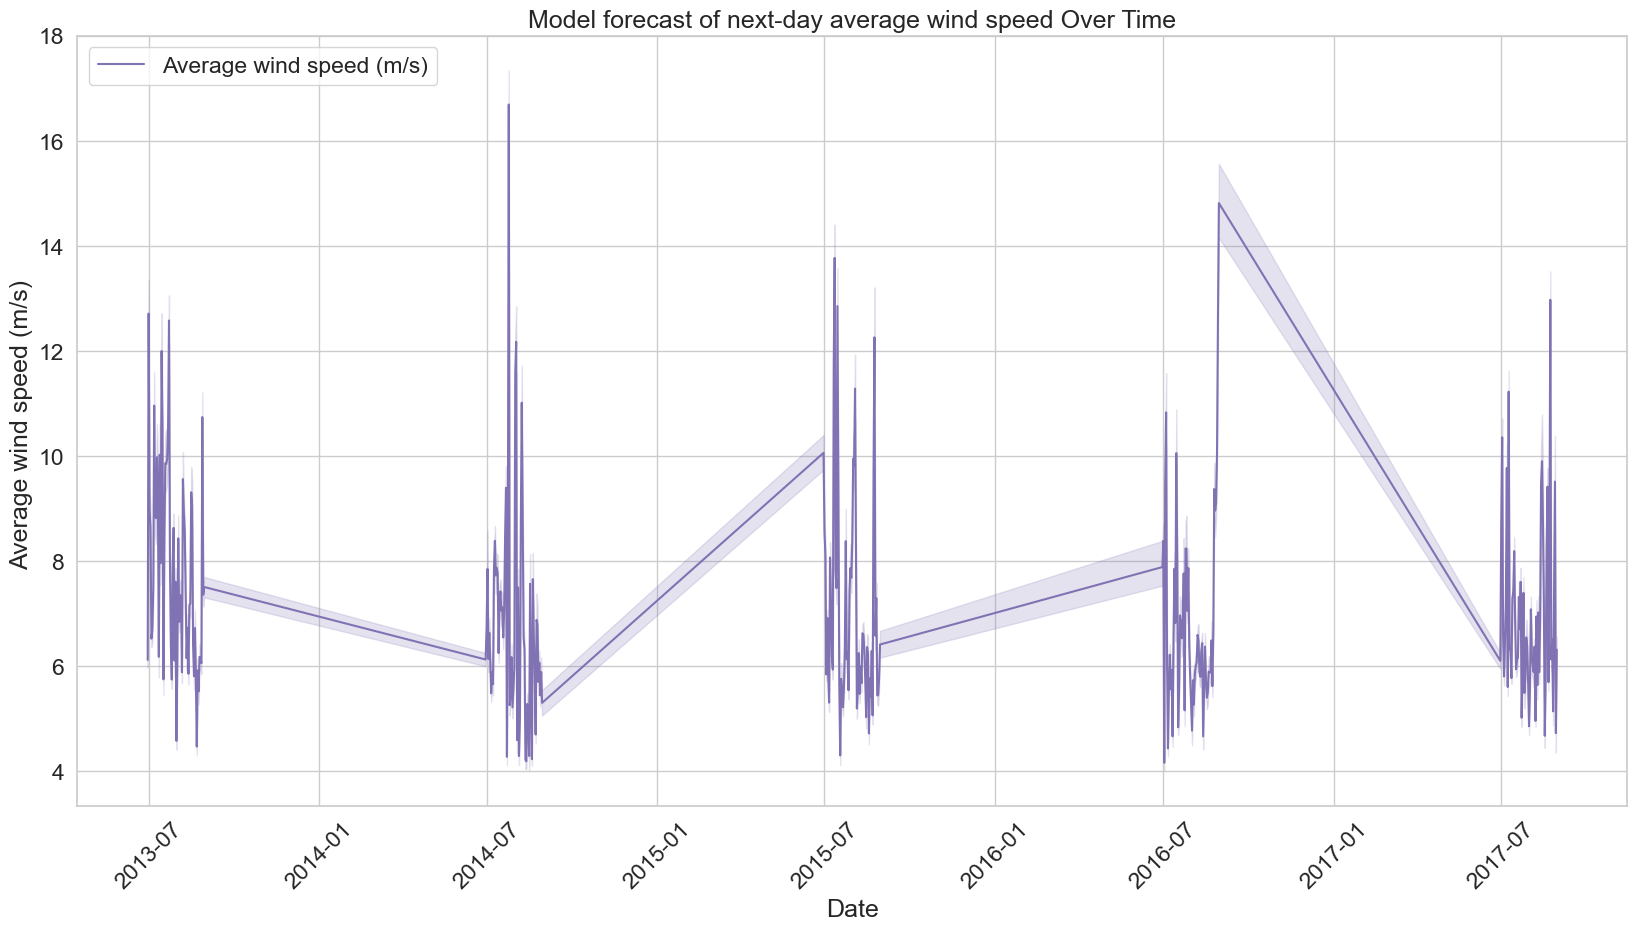

In [78]:
#Model forecast of next-day average wind speed over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_WS', data=df, label='Average wind speed (m/s)', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average wind speed (m/s) ')

plt.show()

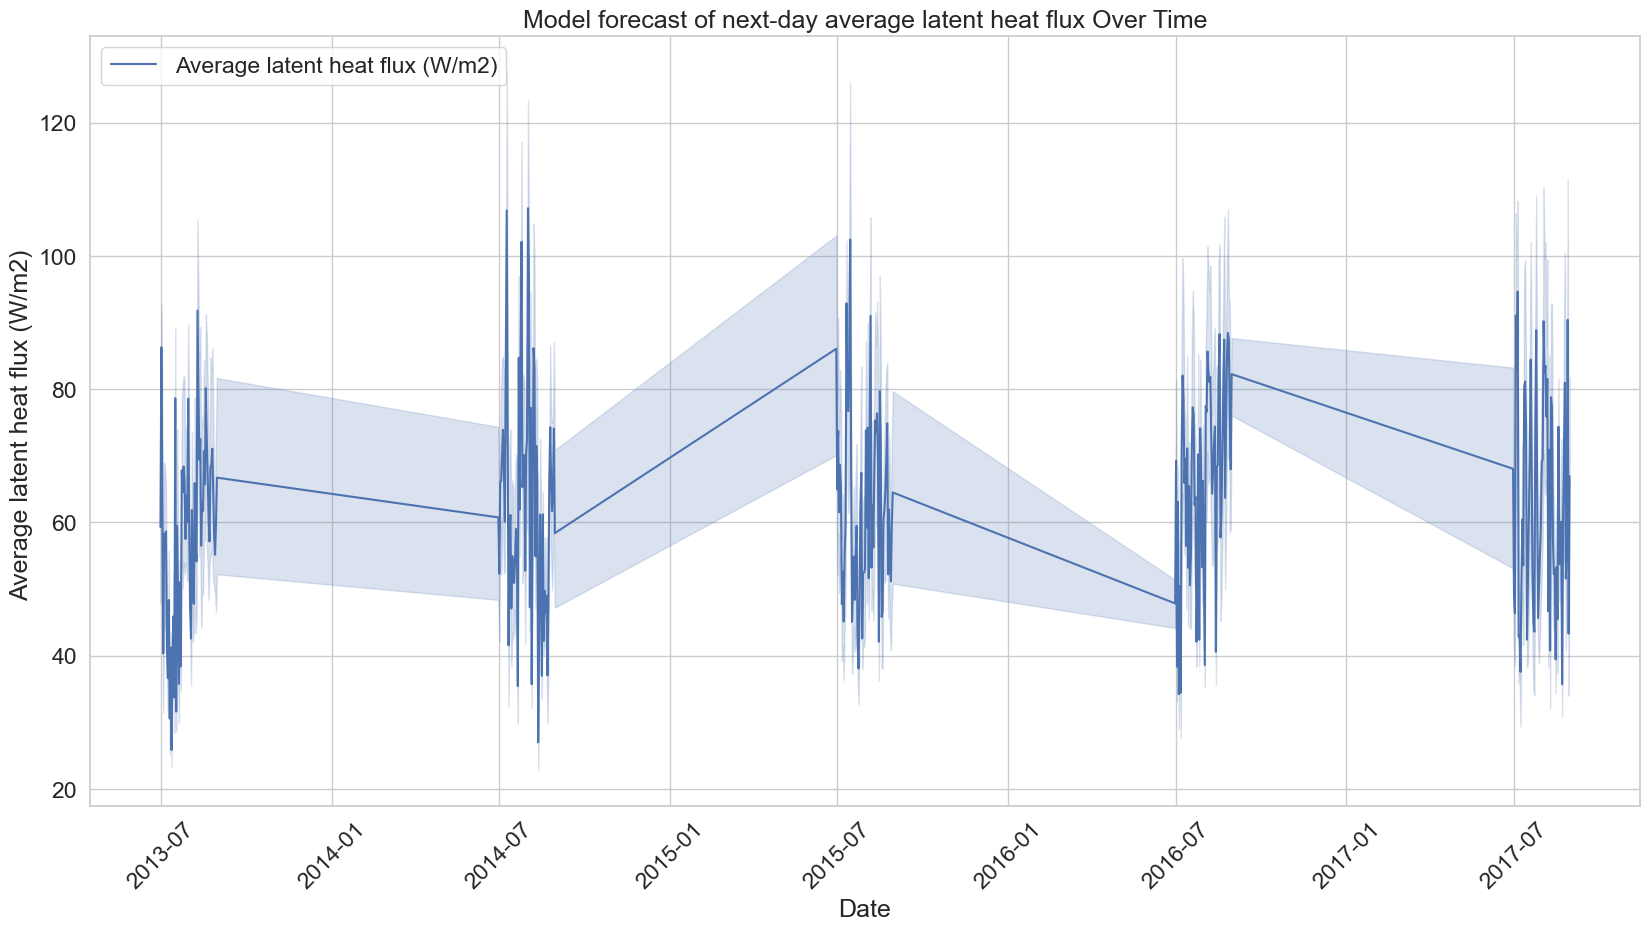

In [79]:
#Model forecast of next-day average latent heat flux (W/m2) over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_LH', data=df, label='Average latent heat flux (W/m2)', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average latent heat flux Over Time')
plt.xlabel('Date')
plt.ylabel('Average latent heat flux (W/m2) ')

plt.show()

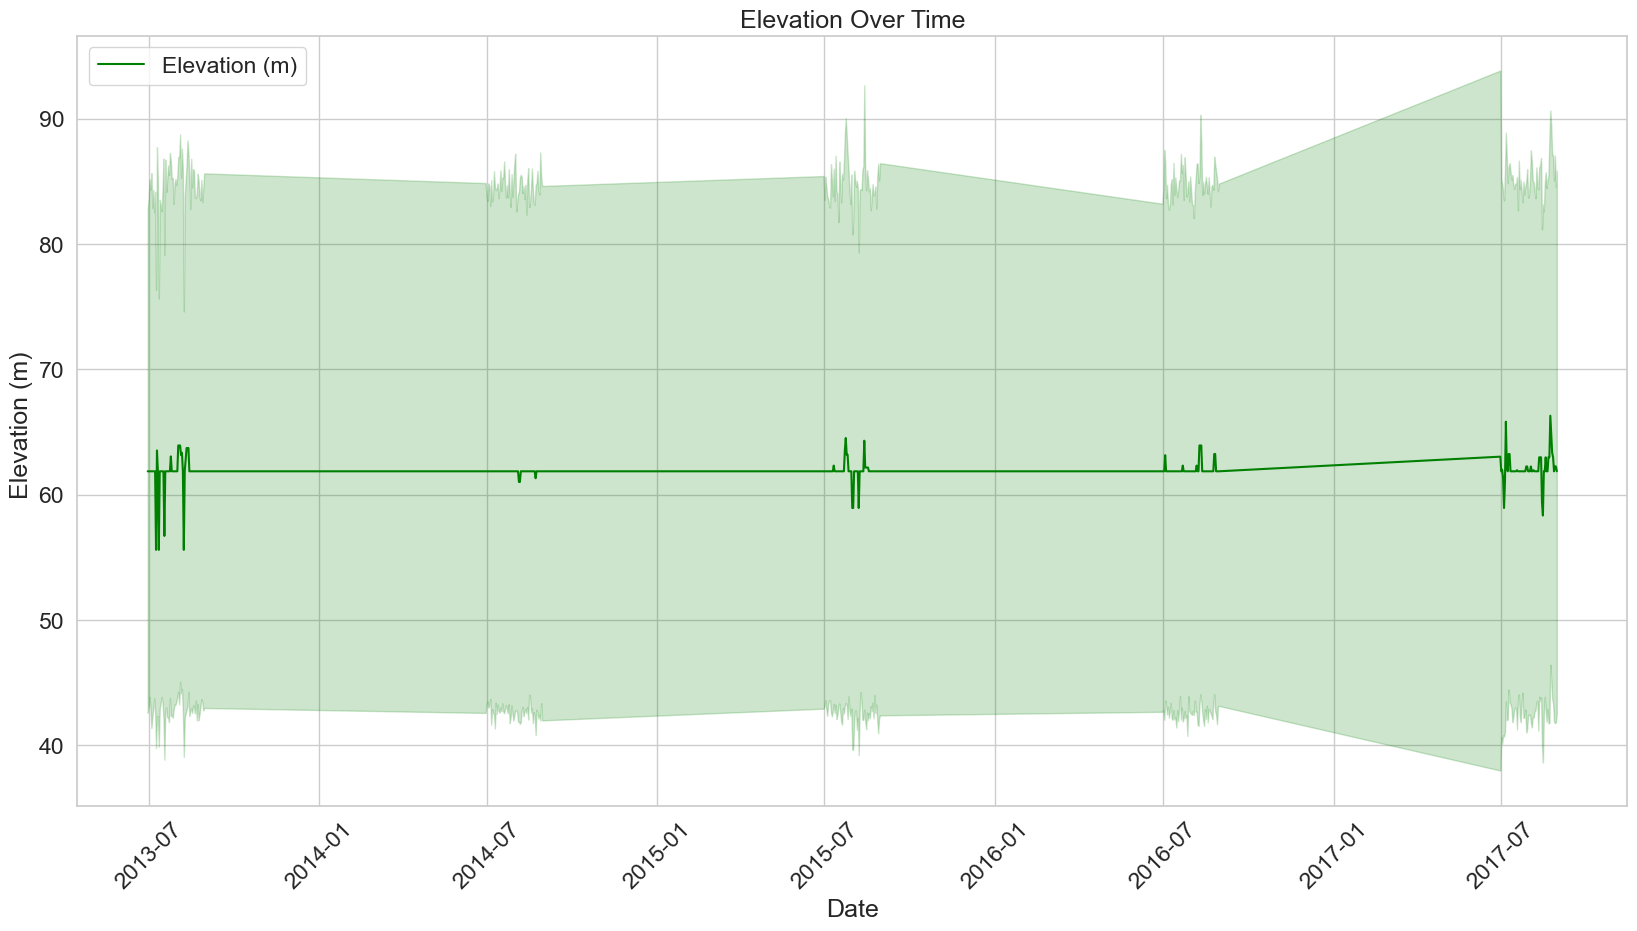

In [80]:
#Elevation over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='DEM', data=df, label='Elevation (m)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (m) ')

plt.show()


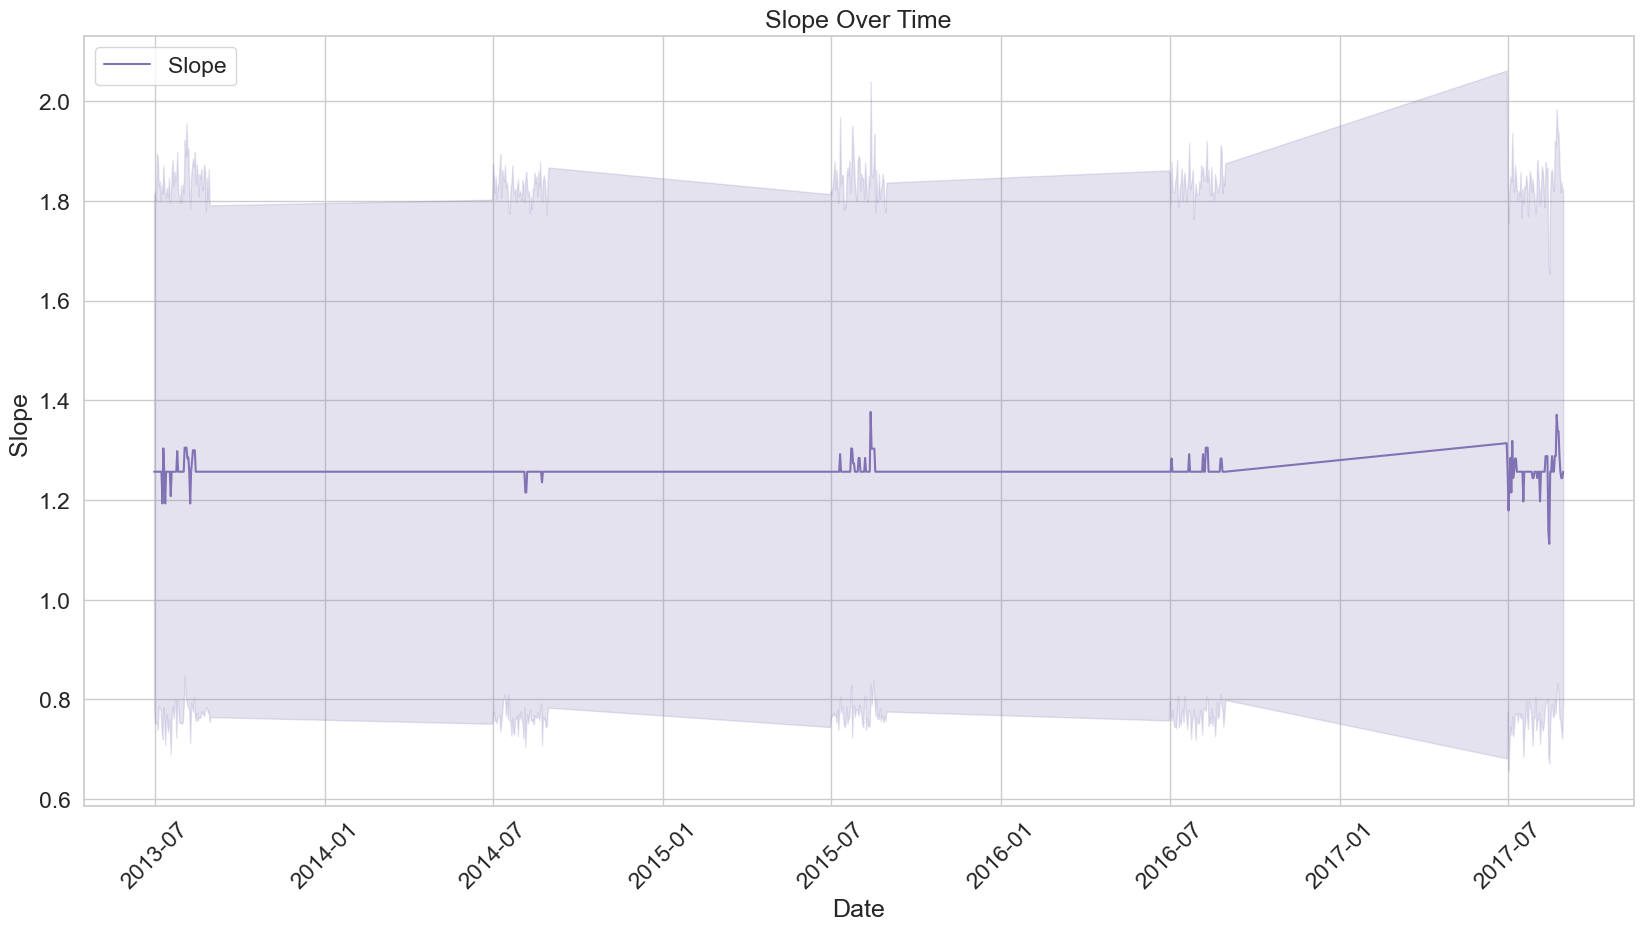

In [81]:
#Slope over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Slope', data=df, label='Slope', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Slope Over Time')
plt.xlabel('Date')
plt.ylabel('Slope ')

plt.show()


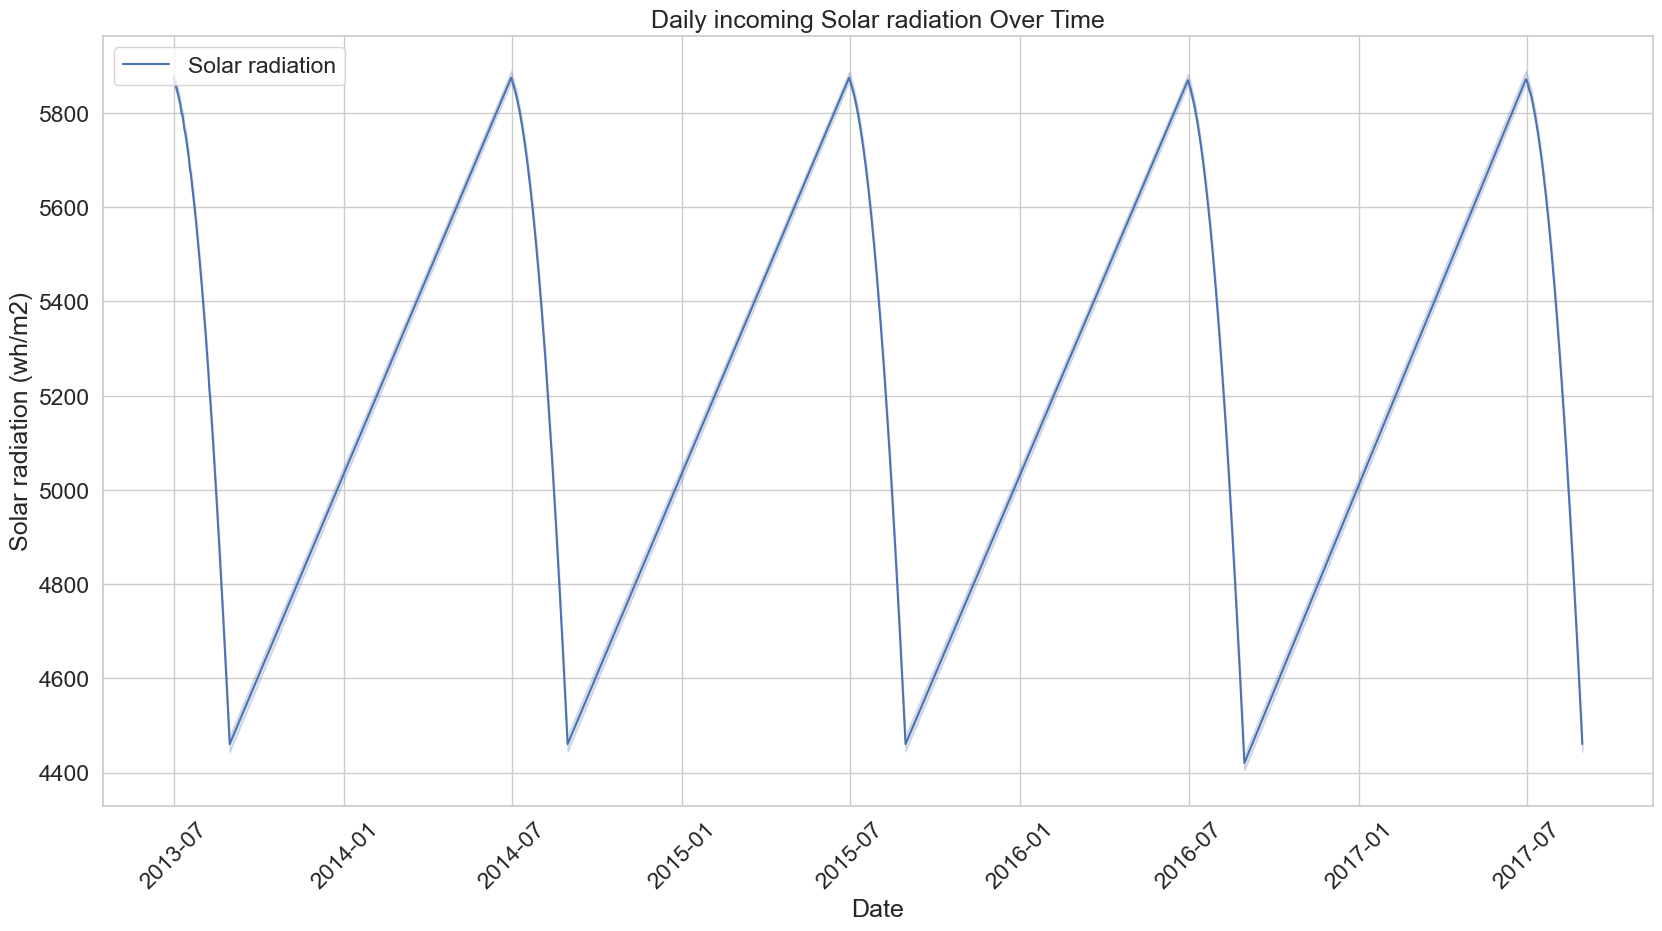

In [82]:
#Daily incoming Solar radiation over time
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Solar radiation', data=df, label='Solar radiation', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily incoming Solar radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar radiation (wh/m2)')

plt.show()


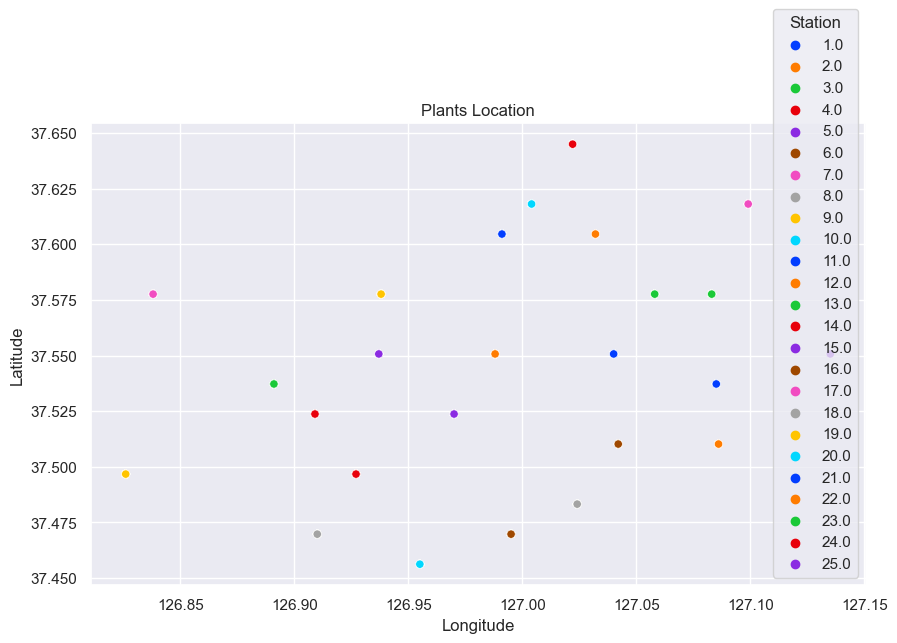

In [84]:
#Plant / Station Location
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)  

sns.scatterplot(x='lon', y='lat', hue='station', data=df, palette='bright')

plt.legend(loc='lower right').set_title("Station")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location')
plt.show()

In [85]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove Date column which was replace by year, month and day
df.drop(['Date'], axis=1, inplace=True)

df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

In [87]:
#Multivariate Analysis
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}


# Fit and transform the column
df['lat'] = OE.fit_transform(df['lat'].values.reshape(-1, 1))
# Store the category mappings 
category_mappings['lat'] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

    lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0   9.0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1   9.0  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2   8.0  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  11.0  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4   7.0  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  ...  \
7745         27.812697         18.303014  6.603253   9.614074   0.052902  ...   
7746         26.704905         17.814038  5.768083  82.146707   0.066461  ...   
7747         26.352081         18.775678  6.148918  72.058294   0.030034  ...   
7748         27.010193         18.733519  6.542819  47.241457   0.035874  ...   
7749         27.939516         18.522965  7.289264   9.090034   0.048954  ...   

      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
7745  7.0  127.040  26.2980  0.5721      4456.024414       27.6       17.7   
7746  4.0  127.086  21.9668  0.1332      4441.803711       28.0       17.1   
7747  6.0  126.891  15.5876  0.1554      4443.313965       28.3       18.1   
7748  5.0  126.909  17.2956  0.2223      4438.373535       28.6       18.8   
7749  5.0  126.970  19.5844  0.2713      4451.345215       27.8       17.4   

      year  month  day  
7745  2017      8   30  
7746  2017      8   30  
7747  2017      8   30  
7748  2017      8   30  
7749  2017      8   30  

[5 rows x 27 columns]

In [88]:
df['lon'] = OE.fit_transform(df['lon'].values.reshape(-1, 1))
category_mappings['lon'] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

    lat   lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  year  \
0   9.0  11.0  212.3350  2.7850      5992.895996       29.1       21.2  2013   
1   9.0  16.0   44.7624  0.5141      5869.312500       30.5       22.5  2013   
2   8.0  19.0   33.3068  0.2661      5863.555664       31.1       23.9  2013   
3  11.0  14.0   45.7160  2.5348      5856.964844       31.7       24.3  2013   
4   7.0  24.0   35.0380  0.5055      5859.552246       31.2       22.5  2013   

   month  day  
0      6   30  
1      6   30  
2      6   30  
3      6   30  
4      6   30  

[5 rows x 27 columns]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  ...  \
7745         27.812697         18.303014  6.603253   9.614074   0.052902  ...   
7746         26.704905         17.814038  5.768083  82.146707   0.066461  ...   
7747         26.352081         18.775678  6.148918  72.058294   0.030034  ...   
7748         27.010193         18.733519  6.542819  47.241457   0.035874  ...   
7749         27.939516         18.522965  7.289264   9.090034   0.048954  ...   

      lat   lon      DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  year  \
7745  7.0  17.0  26.2980  0.5721      4456.024414       27.6       17.7  2017   
7746  4.0  22.0  21.9668  0.1332      4441.803711       28.0       17.1  2017   
7747  6.0   2.0  15.5876  0.1554      4443.313965       28.3       18.1  2017   
7748  5.0   3.0  17.2956  0.2223      4438.373535       28.6       18.8  2017   
7749  5.0   9.0  19.5844  0.2713      4451.345215       27.8       17.4  2017   

      month  day  
7745      8   30  
7746      8   30  
7747      8   30  
7748      8   30  
7749      8   30  

[5 rows x 27 columns]

In [89]:
# Calculate the correlation between features
cor = df.corr()
cor


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.184209     -0.042521     -0.060004     0.061782   
lon              -0.150921      0.013461     -0.039905    -0.066873   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
year              0.001474      0.056002      0.037457    -0.002147   
month             0.003114      0.147358      0.084047    -0.190674   
day              -0.000799     -0.151982     -0.114294    -0.060702   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.151393         -0.021322         -0.072297  0.027283   
lon                  0.045173          0.087506         -0.027287 -0.083683   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
year                -0.144286          0.020308        

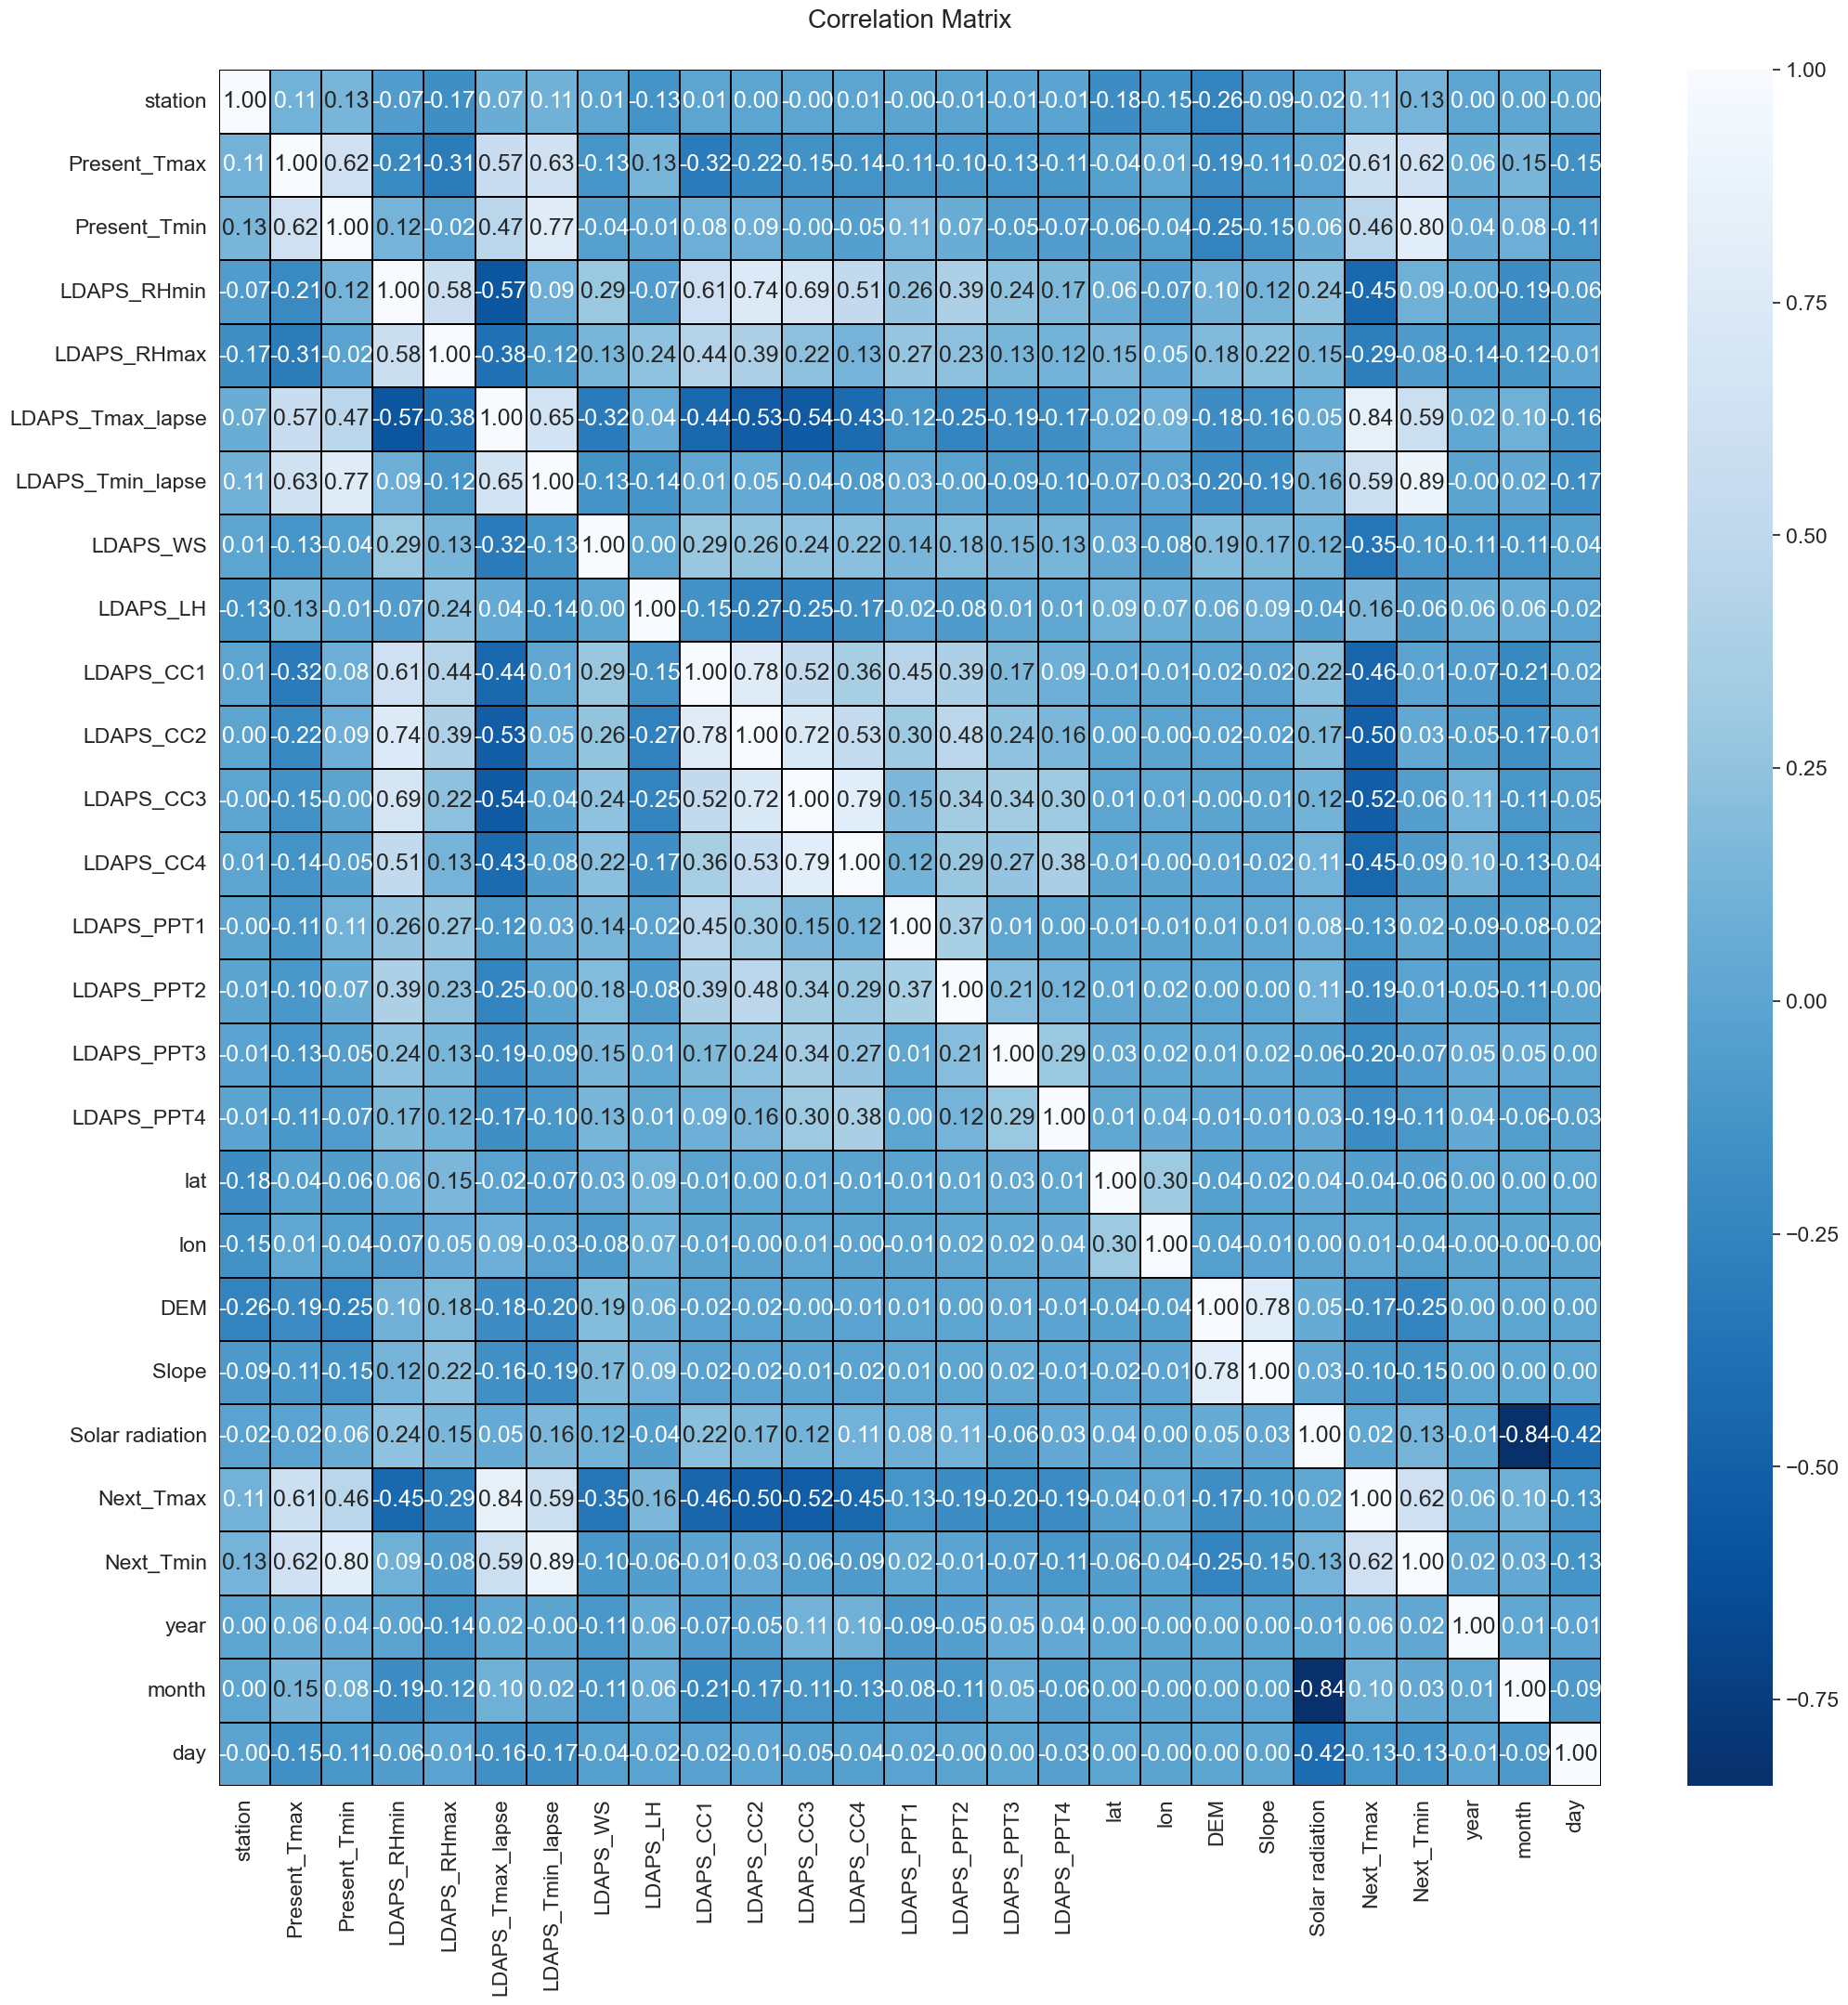

In [90]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

This heatmap contains both positive and negative correlations.

The Next_Tmax feature has a positive correlation with the LDAPS_Tmax_laspse(+0.84), Next_Tmin(+0.62), Present_Tmax(+0.61), Present_Tmin(+0.46), LDAPS_Tmin_lapse(+0.59). Also, has a negative correlation with LDAPS_CC columns(-0.52), LDAPS_RHmin(-0.45) and LDAPS_RHmax(-0.29)

The Next_Tmin feature has a positive correlation with the LDAPS_Tmin_laspse(+0.84), Present_Tmin(+0.80), Present_Tmax(+0.61), LDAPS_Tmin_lapse(+0.59), then LDAPS_CC columns(+0.52) and is negatively correlated with primary_fuel column(-0.38)

The Next_Tmax and Next__Tmin are positive correlated (+0.62)

The lat and lon column is correlated with position, which make sense.

DEM is highly correlated with Slope (+0.78)

LDAPS columns are correlated with each other.

LDAPS_Tmas_lapse and LDAPS_Tmas_lapse are correlated with Present_Tmax and Present_Tmin.

In [91]:
#Removing Outliers
features_with_outliers = ['LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
features_with_outliers

['LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4']

In [92]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z


LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
0        0.382768          0.525269          0.215525  0.126423  0.206603   
1        0.311697          0.078334          0.223368  0.644133  0.313359   
2        0.609425          0.160080          0.449896  0.439100  1.244497   
3        1.128335          0.028710          0.079238  0.663353  0.096026   
4        0.249244          0.171981          0.010803  0.624327  1.349989   
...           ...               ...               ...       ...       ...   
7745     1.402898          0.614083          2.223667  0.225479  1.569844   
7746     0.648815          0.990460          2.432415  0.609132  0.583486   
7747     1.318376          1.110333          2.021883  0.434188  0.283984   
7748     1.537141          0.886737          2.039881  0.253241  0.452772   
7749     1.544257          0.570995          2.129768  0.089654  1.585402   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  
0       0.305589    0.275777    0.239969    0.224971  
1       0.305589    0.275777    0.239969    0.224971  
2       0.305589    0.275777    0.239969    0.224971  
3       0.305589    0.275777    0.239969    0.224971  
4       0.305589    0.275777    0.239969    0.224971  
...          ...         ...         ...         ...  
7745    0.305589    0.275777    0.239969    0.224971  
7746    0.305589    0.275777    0.239969    0.224971  
7747    0.305589    0.275777    0.239969    0.224971  
7748    0.305589    0.275777    0.239969    0.224971  
7749    0.305589    0.275777    0.239969    0.224971  

[7588 rows x 9 columns]

In [93]:
# threshold = 3.1
df_new = df[(z<3.1).all(axis=1)]
df=df_new.copy()
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...   lat   lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...   9.0  11.0  212.3350  2.7850      5992.895996       29.1   
1     ...   9.0  16.0   44.7624  0.5141      5869.312500       30.5   
2     ...   8.0  19.0   33.3068  0.2661      5863.555664       31.1   
3     ...  11.0  14.0   45.7160  2.5348      5856.964844       31.7   
4     ...   7.0  24.0   35.0380  0.5055      5859.552246       31.2   
...   ...   ...   ...       ...     ...              ...        ...   
7745  ...   7.0  17.0   26.2980  0.5721      4456.024414       27.6   
7746  ...   4.0  22.0   21.9668  0.1332      4441.803711       28.0   
7747  ...   6.0   2.0   15.5876  0.1554      4443.313965       28.3   
7748  ...   5.0   3.0   17.2956  0.2223      4438.373535       28.6   
7749  ...   5.0   9.0   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  year  month  day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6838 rows x 27 columns]

In [94]:
#Skewness Correction
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
LDAPS_PPT4        5.936245
LDAPS_PPT3        5.513040
LDAPS_PPT2        4.832021
LDAPS_PPT1        3.730281
DEM               1.749481
Slope             1.584216
LDAPS_WS          1.099534
LDAPS_CC4         0.707785
LDAPS_CC3         0.696620
LDAPS_CC1         0.587032
LDAPS_LH          0.571404
LDAPS_CC2         0.504339
LDAPS_RHmin       0.309590
year              0.015131
lon               0.005007
station          -0.003136
day              -0.006705
LDAPS_Tmax_lapse -0.121441
month            -0.168667
Next_Tmax        -0.275309
Present_Tmax     -0.287600
lat              -0.334288
Next_Tmin        -0.335940
Present_Tmin     -0.339229
LDAPS_Tmin_lapse -0.428164
Solar radiation  -0.519327
LDAPS_RHmax      -0.707277

In [95]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['DEM',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'LDAPS_WS',
 'Slope']

In [96]:
# The categorical variables will not be taken into account
skew_columns.remove('DEM')
skew_columns.remove('Slope')

In [97]:
skew_columns

['LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'LDAPS_WS']

In [100]:
# Removing skewness using yeo-johnson method to get better prediction
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [103]:
df[skew_columns] = scaler.fit_transform(df[skew_columns].values)
df[skew_columns].head()

LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_LH  LDAPS_PPT1  \
0  -0.309921  -0.426132  -0.463877  -0.514987  0.347596   -0.527957   
1  -0.350949  -0.193377  -0.477091  -0.535118 -0.168214   -0.527957   
2  -0.431130  -0.166729  -0.226426  -0.445813 -1.377730   -0.527957   
3  -0.396006  -0.316642  -0.467036  -0.494273  0.243736   -0.527957   
4  -0.736966  -0.201727  -0.365048  -0.281500  1.293736   -0.527957   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  LDAPS_WS  
0   -0.485383   -0.464273   -0.417195  0.168899  
1   -0.485383   -0.464273   -0.417195 -0.578739  
2   -0.485383   -0.464273   -0.417195 -0.257714  
3   -0.485383   -0.464273   -0.417195 -0.610778  
4   -0.485383   -0.464273   -0.417195 -0.546091

In [104]:
df.skew()

station            -0.003136
Present_Tmax       -0.287600
Present_Tmin       -0.339229
LDAPS_RHmin         0.309590
LDAPS_RHmax        -0.707277
LDAPS_Tmax_lapse   -0.121441
LDAPS_Tmin_lapse   -0.428164
LDAPS_WS            0.008106
LDAPS_LH           -0.030830
LDAPS_CC1           0.065055
LDAPS_CC2           0.050263
LDAPS_CC3           0.094530
LDAPS_CC4           0.141552
LDAPS_PPT1          1.603236
LDAPS_PPT2          1.815830
LDAPS_PPT3          1.979827
LDAPS_PPT4          2.246824
lat                -0.334288
lon                 0.005007
DEM                 1.749481
Slope               1.584216
Solar radiation    -0.519327
Next_Tmax          -0.275309
Next_Tmin          -0.335940
year                0.015131
month              -0.168667
day                -0.006705
dtype: float64

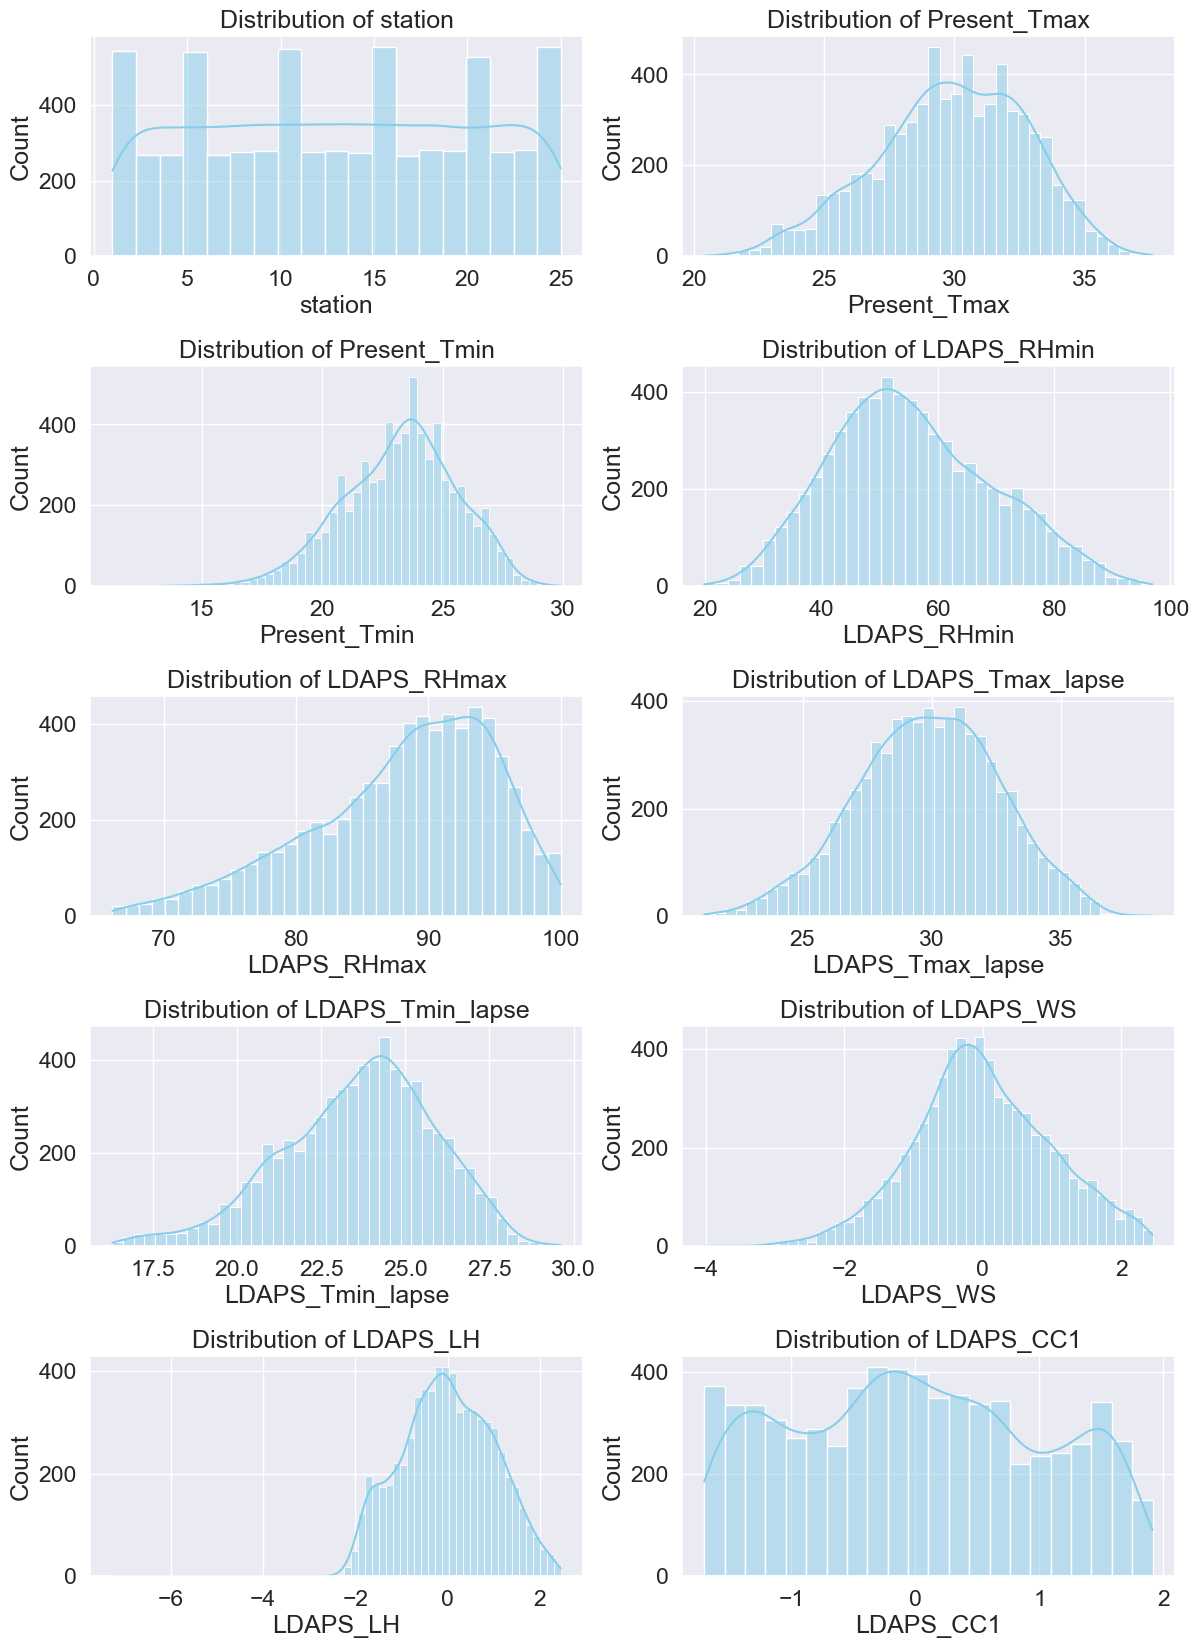

In [106]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, df):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [107]:
#Feature Scaling using Standard Scalarisation
# Separating the independent and target variables into x and y 
x = df.drop('Next_Tmax', axis=1)
y = df['Next_Tmax']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (6838, 26)
Label Dimension = (6838,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.168899  0.347596  -0.309921  ...   
1         29.850689         24.035009 -0.578739 -0.168214  -0.350949  ...   
2         30.091292         24.565633 -0.257714 -1.377730  -0.431130  ...   
3         29.704629         23.326177 -0.610778  0.243736  -0.396006  ...   
4         29.113934         23.486480 -0.546091  1.293736  -0.736966  ...   

   LDAPS_PPT4   lat   lon       DEM   Slope  Solar radiation  Next_Tmin  year  \
0   -0.417195   9.0  11.0  212.3350  2.7850      5992.895996       21.2  2013   
1   -0.417195   9.0  16.0   44.7624  0.5141      5869.312500       22.5  2013   
2   -0.417195   8.0  19.0   33.3068  0.2661      5863.555664       23.9  2013   
3   -0.417195  11.0  14.0   45.7160  2.5348      5856.964844       24.3  2013   
4   -0.417195   7.0  24.0   35.0380  0.5055      5859.552246       22.5  2013   

   month  day  
0      6   30  
1      6   30  
2      6   30  
3      6   30  
4      6   30  

[5 rows x 26 columns]

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [108]:
#Separating features for regression model 2 to predict Next_Tmin
# Separating the independent and target variables into x and y 
x2 = df.drop('Next_Tmin', axis=1)
y2 = df['Next_Tmin']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (6838, 26)
Label Dimension = (6838,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.168899  0.347596  -0.309921  ...   
1         29.850689         24.035009 -0.578739 -0.168214  -0.350949  ...   
2         30.091292         24.565633 -0.257714 -1.377730  -0.431130  ...   
3         29.704629         23.326177 -0.610778  0.243736  -0.396006  ...   
4         29.113934         23.486480 -0.546091  1.293736  -0.736966  ...   

   LDAPS_PPT4   lat   lon       DEM   Slope  Solar radiation  Next_Tmax  year  \
0   -0.417195   9.0  11.0  212.3350  2.7850      5992.895996       29.1  2013   
1   -0.417195   9.0  16.0   44.7624  0.5141      5869.312500       30.5  2013   
2   -0.417195   8.0  19.0   33.3068  0.2661      5863.555664       31.1  2013   
3   -0.417195  11.0  14.0   45.7160  2.5348      5856.964844       31.7  2013   
4   -0.417195   7.0  24.0   35.0380  0.5055      5859.552246       31.2  2013   

   month  day  
0      6   30  
1      6   30  
2      6   30  
3      6   30  
4      6   30  

[5 rows x 26 columns]

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 21.3, 20.7, 20.8, 22.1,
       17.8, 19.8, 20.1, 20.3, 19.4, 19.1, 18.9, 20. , 19.7, 20.5, 19.5,
       20.6, 23.1, 23.3, 22.7, 22.6, 22.4, 22. , 23.5, 23.8, 21.7, 22.3,
       21.9, 21.4, 21.5, 19.3, 20.4, 21.8, 24.1, 23.6, 24.4, 24.8, 25.1,
       24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5, 25.8, 25.4, 25.6,
       25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9, 26.8, 26.6, 27. ,
       27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6, 28. , 27.3, 19.9,
       20.2, 19.6, 19.2, 18.6, 18.7, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.3, 28.4, 28.1, 29.1, 28.5, 28.8, 29.8,
       29.5, 28.6, 17.1, 18.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7, 17.2,
       15.5, 16.6, 16.4, 14.7, 15.9, 16. , 17.3, 15.4, 15.3, 13.8, 17. ,
       15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 15. , 14.1, 13.4, 15.7,
       16.2, 29. , 14.3, 16.3, 12.9])

In [110]:
#Scaling the data for regression model to predict Next_Tmax
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)


In [111]:
#Scaling the data for regression model two to predict Next_Tmin
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

In [113]:
#Multicolinearity analysis and feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
21   Solar radiation   39.559157
24             month   32.237801
25               day   10.208449
6   LDAPS_Tmin_lapse    9.423278
5   LDAPS_Tmax_lapse    7.343212
3        LDAPS_RHmin    6.171150
22         Next_Tmin    5.990638
10         LDAPS_CC2    5.173224
11         LDAPS_CC3    4.601606
9          LDAPS_CC1    4.464422
19               DEM    3.972054
2       Present_Tmin    3.518914
20             Slope    3.156047
1       Present_Tmax    2.911902
12         LDAPS_CC4    2.793449
4        LDAPS_RHmax    2.373672
13        LDAPS_PPT1    2.238712
14        LDAPS_PPT2    1.969971
16        LDAPS_PPT4    1.632922
15        LDAPS_PPT3    1.625257
8           LDAPS_LH    1.512275
17               lat    1.264311
7           LDAPS_WS    1.241631
0            station    1.224188
18               lon    1.199180
23              year    1.125114

In [114]:
#Lets drop the month and find out the VIF
x = x.drop(['month'], axis=1) 

In [115]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
6   LDAPS_Tmin_lapse    9.420096
5   LDAPS_Tmax_lapse    7.114975
3        LDAPS_RHmin    6.073762
22         Next_Tmin    5.934773
10         LDAPS_CC2    5.171756
11         LDAPS_CC3    4.588553
9          LDAPS_CC1    4.464248
2       Present_Tmin    3.439319
19               DEM    3.348265
20             Slope    3.033429
1       Present_Tmax    2.864974
12         LDAPS_CC4    2.792698
4        LDAPS_RHmax    2.361779
13        LDAPS_PPT1    2.227072
14        LDAPS_PPT2    1.961314
16        LDAPS_PPT4    1.630213
15        LDAPS_PPT3    1.616808
8           LDAPS_LH    1.510939
21   Solar radiation    1.425314
24               day    1.271647
7           LDAPS_WS    1.234238
0            station    1.221152
18               lon    1.195550
17               lat    1.184305
23              year    1.123200

Its solved the Multicolinearity issue. Lets go ahead with the model building.

In [116]:
#checking VIF for regression model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
21   Solar radiation   39.465038
24             month   32.232525
25               day   10.133711
5   LDAPS_Tmax_lapse    8.866498
6   LDAPS_Tmin_lapse    7.513038
3        LDAPS_RHmin    6.173268
10         LDAPS_CC2    5.162552
11         LDAPS_CC3    4.609906
9          LDAPS_CC1    4.463962
22         Next_Tmax    4.319840
19               DEM    3.720975
2       Present_Tmin    3.295719
20             Slope    3.052857
1       Present_Tmax    2.989499
12         LDAPS_CC4    2.881048
4        LDAPS_RHmax    2.372847
13        LDAPS_PPT1    2.259205
14        LDAPS_PPT2    1.940842
16        LDAPS_PPT4    1.630758
15        LDAPS_PPT3    1.628092
8           LDAPS_LH    1.548384
17               lat    1.261124
7           LDAPS_WS    1.249036
0            station    1.232294
18               lon    1.207436
23              year    1.128300

In [117]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['month'], axis=1) 

In [118]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
5   LDAPS_Tmax_lapse    8.480498
6   LDAPS_Tmin_lapse    7.471034
3        LDAPS_RHmin    6.041244
10         LDAPS_CC2    5.160752
11         LDAPS_CC3    4.599497
9          LDAPS_CC1    4.463850
22         Next_Tmax    4.280256
2       Present_Tmin    3.183130
19               DEM    3.183077
1       Present_Tmax    2.961938
20             Slope    2.959172
12         LDAPS_CC4    2.877775
4        LDAPS_RHmax    2.360561
13        LDAPS_PPT1    2.242313
14        LDAPS_PPT2    1.936343
16        LDAPS_PPT4    1.627873
15        LDAPS_PPT3    1.618394
8           LDAPS_LH    1.544622
21   Solar radiation    1.426420
24               day    1.263770
7           LDAPS_WS    1.241262
0            station    1.228329
18               lon    1.202140
17               lat    1.183796
23              year    1.127072

In [119]:
#Modeling for predicting Next_Tmax
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [120]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [121]:
#Building the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8024 at random_state 66


In [122]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4786, 25)
x_test shape:   (2052, 25)
y_train shape:  (4786,)
y_test shape:   (2052,)


In [123]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [125]:
#Regression Algorithms
#1.Linear Regression
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")



LR coef_        : [ 0.13345034  0.4589784  -0.12513605  0.17191179 -0.02417537  1.53023213
 -0.42066427 -0.28851255  0.23019982  0.0191098  -0.2542334  -0.15556755
 -0.41241355 -0.17533286 -0.0487888  -0.05527601  0.11322257 -0.01466926
 -0.08605353  0.01111441  0.04988136  0.03826135  1.0654971   0.07478178
 -0.01768229]

LR intercept_ : 30.477107030347437
LR score train  : 0.7783994644890562
LR score test   : 0.8023953191811104
Mean squared error: 1.7487
Root Mean squared error: 1.3224
Cross-validation results (R2): [0.60059726 0.71357143 0.63153953 0.58335594 0.7372109  0.59250712
 0.80153088 0.7392831  0.65274515 0.72639944]
Average R2: 0.6779
R2_Score(test): 0.8024


In [127]:
#2.Random Forest Regressor
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=66)

In [128]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)

In [129]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

Best parameters : {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best score : 0.8914742440483459
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)
Mean squared error: 0.8596
Root Mean squared error: 0.9272
Cross-validation results (R2): 0.8914742440483459
Average R2: 0.8915
R2_Score(test): 0.9029


In [130]:
#3.Decision tree Regression 

dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 1.9662
Root Mean squared error: 1.4022
Cross-validation results (R2): [0.45390178 0.30181833 0.37112886 0.55270968 0.35384747]
Average R2: 0.4067
R2_Score(test): 0.7778


In [131]:
#4.Knn Model
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


Mean squared error: 1.0678
Root Mean squared error: 1.0333
Cross-validation results (R2): [0.52250602 0.41057912 0.551306   0.67273163 0.54691465]
Average R2: 0.5408
R2_Score(test): 0.8793


In [132]:
#5.Gradient Booster Regression

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


Mean squared error: 1.1965
Root Mean squared error: 1.0938
Cross-validation results (R2): [0.75030334 0.66848494 0.71516631 0.79882237 0.65926343]
Average R2: 0.7184
R2_Score(test): 0.8648


In [133]:
#6.Support Vector Regressor
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 0.9743
Root Mean squared error: 0.9871
Cross-validation results (R2): [0.73821009 0.59403012 0.69894219 0.80141849 0.59122338]
Average R2: 0.6848
R2_Score(test): 0.8899


From the models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select Random Forest Regressor as our final model.

In [134]:
#Hyperparameter Tuning
random_state

66

In [135]:
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=66, scoring='neg_mean_squared_error')

In [136]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'bootstrap': True}

In [137]:
best_model

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)

In [138]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=130)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.14%


In [162]:
#Saving the model

import joblib
joblib.dump(best_model, "next_tmax_regressor_model.pkl")

['next_tmax_regressor_model.pkl']

In [163]:
# Lets load the saved model and get the predictions
model = joblib.load("next_tmax_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.2f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 90.45 %


0        1        2          3          4          5     \
Predicted  24.658633  21.7919  23.8007  26.630833  22.293267  22.231567   
Original   25.000000  22.7000  25.3000  27.300000  21.800000  22.100000   

                6          7          8        9     ...       2042     2043  \
Predicted  21.543933  21.503667  24.714333  19.1163  ...  23.648397  22.9223   
Original   21.400000  21.700000  24.800000  19.8000  ...  23.800000  22.1000   

                2044       2045       2046       2047       2048       2049  \
Predicted  22.070467  23.340467  21.912667  23.790467  22.528333  24.429833   
Original   21.700000  25.000000  20.600000  24.100000  22.700000  23.700000   

                2050       2051  
Predicted  21.564367  23.303333  
Original   22.100000  23.800000  

[2 rows x 2052 columns]

In [143]:
#Modeling for predicting Next_Tmin
#Finding the best random state
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x2, y2) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8562 at random_state 92


In [144]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=random_state)

In [145]:
#Regression Algorithm
#1.Linear Regression
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

LR coef_        : [-2.74773403e-02  6.45100831e-02  5.00759490e-01  2.45734959e-01
  3.50914831e-02 -2.68927733e-02  1.33726502e+00  1.80445369e-01
  2.55166261e-03 -1.64586634e-02  1.63228953e-01  2.02047690e-02
  6.46691818e-02 -3.25664837e-02 -1.61046111e-01 -1.32590152e-04
 -9.98688111e-02 -2.43791280e-02 -2.81471297e-02 -3.81213266e-01
  2.71642220e-01  1.94111282e-02  5.86003568e-01  7.52759051e-04
  9.00201990e-02]

LR intercept_ : 23.014644718074106
LR score train  : 0.8412477398746512
LR score test   : 0.8562088994189634
Mean squared error: 0.8342
Root Mean squared error: 0.9133
Cross-validation results (R2): [0.60059726 0.71357143 0.63153953 0.58335594 0.7372109  0.59250712
 0.80153088 0.7392831  0.65274515 0.72639944]
Average R2: 0.6779
R2_Score(test): 0.8562


In [146]:
#2.Random Forest Regressor
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=92)

In [147]:
random_search.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)

In [148]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

Best parameters : {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best score : 0.8960479925479297
Best Estimator:  RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)
Mean squared error: 0.5538
Root Mean squared error: 0.7442
Cross-validation results (R2): 0.8960479925479297
Average R2: 0.8960
R2_Score(test): 0.9045


In [149]:
#3.Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 1.1247
Root Mean squared error: 1.0605
Cross-validation results (R2): [0.42364268 0.28979857 0.39513887 0.53581821 0.35308961]
Average R2: 0.3995
R2_Score(test): 0.8061


In [150]:
#4.Knn 
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 0.7001
Root Mean squared error: 0.8367
Cross-validation results (R2): [0.52250602 0.41057912 0.551306   0.67273163 0.54691465]
Average R2: 0.5408
R2_Score(test): 0.8793


In [151]:
#5.Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 0.5624
Root Mean squared error: 0.7499
Cross-validation results (R2): [0.74983903 0.66848494 0.71525719 0.79961644 0.65914879]
Average R2: 0.7185
R2_Score(test): 0.9031


In [152]:
#6.Support Vector Regressor
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 0.4411
Root Mean squared error: 0.6641
Cross-validation results (R2): [0.73821009 0.59403012 0.69894219 0.80141849 0.59122338]
Average R2: 0.6848
R2_Score(test): 0.9240


From the models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select Random Forest Regressor as our final model.

In [153]:
#Hyperparameter Tuning
random_state


92

In [154]:
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=92, scoring='neg_mean_squared_error')

In [155]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

In [156]:
best_model

RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)

In [157]:
#Final Regression Model 2 to predict Next_Tmin
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=50)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.45%


In [158]:
#Saving the model

import joblib
joblib.dump(best_model, "next_tmin_regressor_model.pkl")

['next_tmin_regressor_model.pkl']

In [160]:
# Lets load the saved model and get the predictions
model = joblib.load("next_tmin_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.2f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 90.45 %


0        1        2          3          4          5     \
Predicted  24.658633  21.7919  23.8007  26.630833  22.293267  22.231567   
Original   25.000000  22.7000  25.3000  27.300000  21.800000  22.100000   

                6          7          8        9     ...       2042     2043  \
Predicted  21.543933  21.503667  24.714333  19.1163  ...  23.648397  22.9223   
Original   21.400000  21.700000  24.800000  19.8000  ...  23.800000  22.1000   

                2044       2045       2046       2047       2048       2049  \
Predicted  22.070467  23.340467  21.912667  23.790467  22.528333  24.429833   
Original   21.700000  25.000000  20.600000  24.100000  22.700000  23.700000   

                2050       2051  
Predicted  21.564367  23.303333  
Original   22.100000  23.800000  

[2 rows x 2052 columns]

The final regression model 1 is RandomForestRegressor with an R2 score of 90.14% for predicting Next_Tmax.
The final regression model 2 is RandomForestRegressor with an R2 score of 90.45% for predicting Next_Tmin